In [27]:
# import pandas as pd
# import numpy as np

# # --- Step 1: Load raw Excel file ---
# path = '/Users/theonarh/Desktop/TopAgenda/sark/data/'
# raw_file = "Independent Variables - Digital Economy.xlsx"
# df = pd.read_excel(path + raw_file, header=None)

# # --- Step 2: Clean the values ---
# def clean_value(val):
#     if isinstance(val, str):
#         val = val.replace("GHS", "")  # Remove 'GHS'
#         val = val.replace(",", "")    # Remove commas
#         val = val.replace("%", "")    # Remove %
#         val = val.strip()
#         if val == "":
#             return np.nan
#     return val

# df = df.applymap(clean_value)
# df = df.apply(pd.to_numeric, errors='ignore')  # Convert to numeric where possible

# # --- Step 3: Rename columns using shortened headers ---
# short_headers = {
#     0: 'Year',
#     1: 'MoMo_Volume',
#     2: 'MoMo_Value',
#     3: 'MoMo_Avg_Value',
#     4: 'Bank_Acc_Pct',
#     5: 'MoMo_Acc_Pct',
#     6: 'Digital_Loan_Use',
#     7: 'Loan_Penetration',
#     8: 'Fintech_Adoption',
#     9: 'Broadband_Pct',
#     10: 'Mobile_4G_Coverage',
#     11: 'Internet_Use_Pct',
#     12: 'ICT_Growth',
#     13: 'Egov_Index',
#     14: 'Retail_Penetration',
#     15: 'Digital_Trade_Vol',
#     16: 'Digital_Trade_Val'
# }

# df.columns = [short_headers.get(i, f"Col_{i}") for i in df.columns]

# # --- Step 4: Save cleaned dataset ---
# df.to_excel(path +  "cleaned_data.xlsx", index=False)
# df.to_csv(path +  "cleaned_data.csv", index=False)

# print("Cleaned data saved to 'cleaned_data.xlsx' and 'cleaned_data.csv'.")


In [28]:
import pandas as pd
import numpy as np

# --- Step 1: Load raw Excel file ---
path = '/Users/theonarh/Desktop/TopAgenda/sark/data/'
raw_file = "Independent Variables - Digital Economy.xlsx"
df = pd.read_excel(path + raw_file, header=None)

# --- Step 2: Clean the values (no applymap, no deprecated errors='ignore') ---
def clean_value(val):
    if isinstance(val, str):
        val = val.replace("GHS", "")  # Remove 'GHS'
        val = val.replace(",", "")    # Remove commas
        val = val.replace("%", "")    # Remove %
        val = val.strip()
        if val == "":
            return np.nan
    return val

# Apply cleaning row-wise to avoid applymap deprecation
for col in df.columns:
    df[col] = df[col].apply(clean_value)
    # Try converting to numeric, coerce errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Step 3: Rename columns using shortened headers ---
short_headers = {
    0: 'Year',
    1: 'MoMo_Volume',
    2: 'MoMo_Value',
    3: 'MoMo_Avg_Value',
    4: 'Bank_Acc_Pct',
    5: 'MoMo_Acc_Pct',
    6: 'Digital_Loan_Use',
    7: 'Loan_Penetration',
    8: 'Fintech_Adoption',
    9: 'Broadband_Pct',
    10: 'Mobile_4G_Coverage',
    11: 'Internet_Use_Pct',
    12: 'ICT_Growth',
    13: 'Egov_Index',
    14: 'Retail_Penetration',
    15: 'Digital_Trade_Vol',
    16: 'Digital_Trade_Val'
}

df.columns = [short_headers.get(i, f"Col_{i}") for i in df.columns]

# --- Step 4: Save cleaned dataset ---
df.to_excel(path + "cleaned_data.xlsx", index=False)
df.to_csv(path + "cleaned_data.csv", index=False)

print("Cleaned data saved to 'cleaned_data.xlsx' and 'cleaned_data.csv'.")


Cleaned data saved to 'cleaned_data.xlsx' and 'cleaned_data.csv'.


In [21]:
import pandas as pd
import numpy as np

# --- Step 1: Load raw Excel file ---
path = '/Users/theonarh/Desktop/TopAgenda/sark/data/'
raw_file = "Independent Variables - Digital Economy.xlsx"
# df = pd.read_excel(path + raw_file, header=None)
df = pd.read_excel(path + raw_file, sheet_name="Sheet1", header=None)



# --- Step 2: Ensure 17 columns by padding missing ones ---
expected_cols = 26
actual_cols = df.shape[1]

if actual_cols < expected_cols:
    for col in range(actual_cols, expected_cols):
        df[col] = np.nan  # Add missing columns with NaN

df = df.iloc[:, :expected_cols]  # Truncate to 17 in case of extra columns

# --- Step 3: Clean the values ---
def clean_value(val):
    if isinstance(val, str):
        val = val.replace("GHS", "")  # Remove 'GHS'
        val = val.replace(",", "")    # Remove commas
        val = val.replace("%", "")    # Remove %
        val = val.strip()
        if val == "":
            return np.nan
    return val

# Apply cleaning and convert to numeric
for col in df.columns:
    df[col] = df[col].apply(clean_value)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Step 4: Rename columns using shortened headers ---
short_headers = {
    0: 'Year',
    1: 'MoMo_Volume',
    2: 'MoMo_Value',
    3: 'MoMo_Avg_Value',
    4: 'Bank_Acc_Pct',
    5: 'MoMo_Acc_Pct',
    6: 'Digital_Loan_Use',
    7: 'Loan_Penetration',
    8: 'Fintech_Adoption',
    9: 'Broadband_Pct',
    10: 'Mobile_4G_Coverage',
    11: 'Internet_Use_Pct',
    12: 'ICT_Growth',
    13: 'Egov_Index',
    14: 'Retail_Penetration',
    15: 'Digital_Trade_Vol',
    16: 'Digital_Trade_Val',
    17: 'Internet_Access_Pct',
    18: 'Regions_4G_Coverage_Pct',
    19: 'Data_Affordability_Index',
    20: 'Electricity_Access_ICT',
    21: 'ICT_Fintech_Regulations',
    22: 'DigitalPolicyAgencies',    
    23: 'PPP_Investments_USD',
    24: 'ICT_GDP_Contribution_Pct',
    25: 'Digital_GDP_Contribution_USD'
}

df.columns = [short_headers.get(i, f"Col_{i}") for i in df.columns]

# --- Step 5: Save cleaned dataset ---
df.to_excel(path + "cleaned_data.xlsx", index=False)
df.to_csv(path + "cleaned_data.csv", index=False)

print("Cleaned data saved to 'cleaned_data.xlsx' and 'cleaned_data.csv'.")


✅ Cleaned data saved to 'cleaned_data.xlsx' and 'cleaned_data.csv'.


In [25]:
df_ = pd.read_csv(path + "cleaned_data.csv")
df_ = df_.drop(index=0).reset_index(drop=True)
df_.head()

Year   MoMo_Volume    MoMo_Value  MoMo_Avg_Value  Bank_Acc_Pct  \
0  2014.0  4.085356e+07  1.833000e+08        4.486757         34.62   
1  2015.0  1.131797e+08  3.051000e+08        2.695712           NaN   
2  2016.0  2.662465e+08  4.470000e+08        1.678895           NaN   
3  2017.0  9.815646e+08  6.034000e+08        0.614733         42.28   
4  2018.0  1.454471e+09  2.232072e+11      153.462847           NaN   

   MoMo_Acc_Pct  Digital_Loan_Use  Loan_Penetration  Fintech_Adoption  \
0         13.01              8.33               NaN              25.0   
1           NaN               NaN               NaN               NaN   
2           NaN               NaN               NaN               NaN   
3         38.95             11.60               NaN              50.0   
4           NaN               NaN               NaN               NaN   

   Broadband_Pct  ...  Digital_Trade_Val  Internet_Access_Pct  \
0            NaN  ...       4.560000e+06                0.190   
1           0.33  ...       1.228000e+07                0.230   
2           0.37  ...       6.833000e+06                0.280   
3           0.30  ...       1.785059e+11                0.379   
4           0.27  ...       2.517326e+11                0.430   

   Regions_4G_Coverage_Pct  Data_Affordability_Index  Electricity_Access_ICT  \
0                   0.0110                    0.0498                     NaN   
1                   0.0116                    0.0396                     NaN   
2                   0.2800                    0.0446                   0.804   
3                   0.3300                    0.0370                     NaN   
4                   0.4830                    0.0491                     NaN   

   ICT_Fintech_Regulations  DigitalPolicyAgencies  PPP_Investments_USD  \
0                      0.0                    9.0                  NaN   
1                      2.0                    9.0                  NaN   
2                      0.0                    9.0                  NaN   
3                      0.0                   10.0                  NaN   
4                      0.0                   10.0                  NaN   

   ICT_GDP_Contribution_Pct  Digital_GDP_Contribution_USD  
0                     0.297                  5.478000e+10  
1                     0.119                  4.941000e+10  
2                     0.056                  5.616000e+10  
3                     0.042                  6.041000e+10  
4                     0.131                  6.730000e+10  

[5 rows x 26 columns]

In [26]:
df_.shape

(11, 26)

* **Define output directory**

In [29]:
import os
# Define the name of the output directory
output_dir = "gdp_results_1"

# Check if the directory already exists
if not os.path.exists(output_dir):
    # If not, create the directory
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created successfully.")
else:
    print(f"Directory '{output_dir}' already exists.")

Directory 'gdp_results_1' created successfully.


* check and fill in missing gaps

/var/folders/lh/frqdv26s63q0khw4yb3jf8kc0000gn/T/ipykernel_8445/4170869146.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


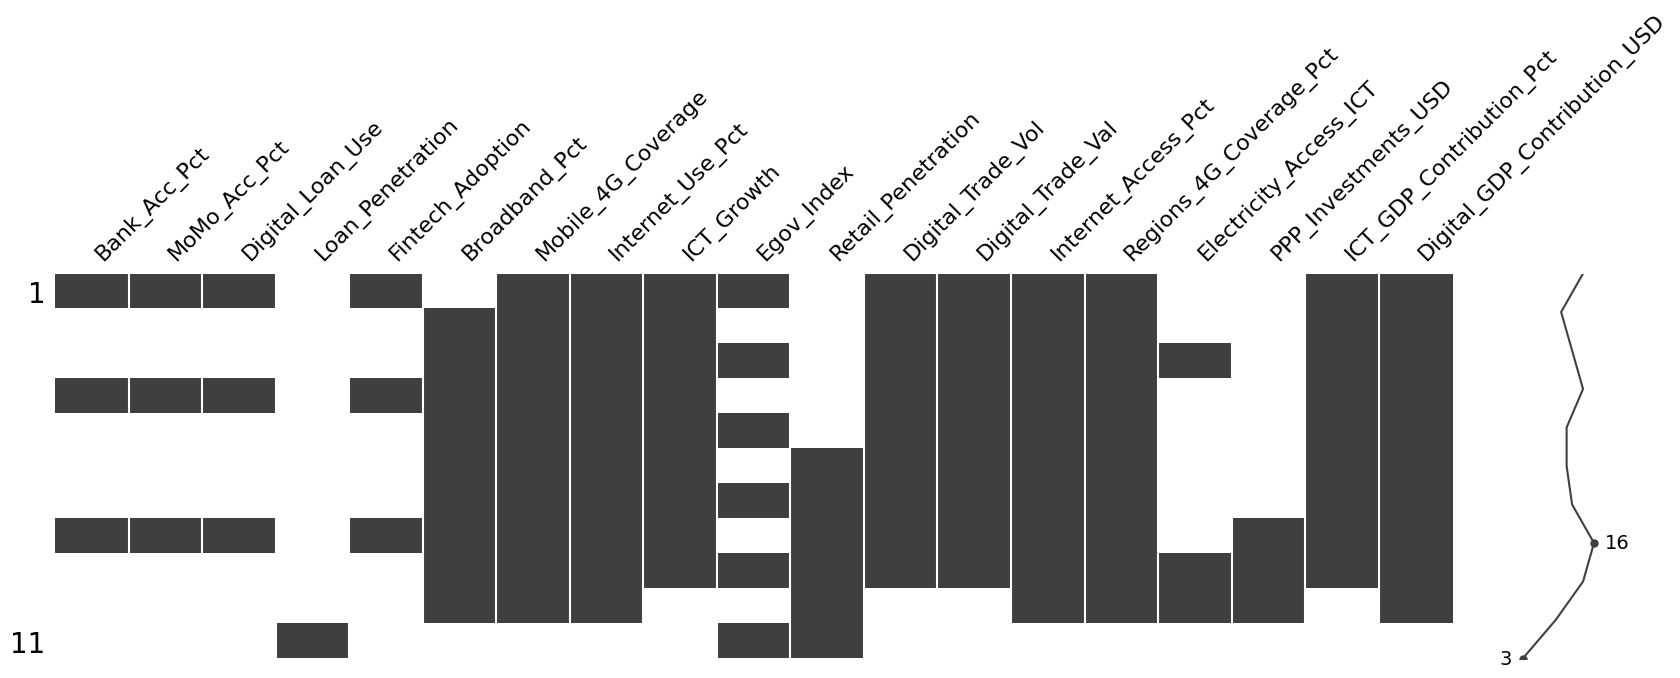

In [30]:
import missingno as msno
import matplotlib.pyplot as plt

def generate_sparsity_matrix(dfs, ndfs=5, directory_path='', plot_prefix='plot'):
    for i in range(ndfs):
        if i not in dfs:
            print(f"DataFrame index {i} not found in the dictionary.")
            continue
        
        df = dfs[i]
        
        if df.empty:
            print(f"DataFrame index {i} is empty.")
            continue
        
        missing_df_i = df.columns[df.isnull().any()].tolist()
        
        if not missing_df_i:
            print(f"No missing values in DataFrame index {i}.")
            continue
        
        # Generate the Missingness Matrix
        msno.matrix(df[missing_df_i], figsize=(20, 5))
        
        # Save the figure in both PDF and PNG formats
        for ext in ['pdf', 'png']:
            plt.savefig(directory_path + '/' + f'{plot_prefix}_df_{i}.{ext}', 
                        bbox_inches='tight',   # Trim the white spaces around the figure
                        pad_inches=0.1,        # Padding between the figure and the edges
                        format=ext,            # Save as the current extension
                        dpi=300 if ext == 'png' else None,  # Set DPI only for PNG format
                        transparent=True
                       )
        
        # Ensure the layout is optimized before showing or saving
        plt.tight_layout()
        plt.show()

# Adjust ndfs as necessary
dataframes = {0: df_}  # Assuming df is already defined
# directory_path = './plots'  # Adjust to your desired path
plot_prefix = 'sparsity_matrix'  # Adjust to your desired plot prefix

# Call the function with ndfs=1 (number of DataFrames) 
generate_sparsity_matrix(dataframes, ndfs=1, directory_path=f'{output_dir}', plot_prefix=plot_prefix)


In [32]:
import os

def filter_columns_by_missingness(df, threshold=0.3, return_dropped=False):
    """
    Filters out columns in a DataFrame that exceed the missing value threshold.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - threshold (float): Maximum allowed proportion of missing values (between 0 and 1).
    - return_dropped (bool): If True, also return the dropped columns.

    Returns:
    - df_filtered (pd.DataFrame): DataFrame with only valid columns.
    - (optional) dropped_columns (list): List of dropped column names.
    """
    missing_proportions = df.isnull().mean()
    valid_columns = missing_proportions[missing_proportions < threshold].index
    df_filtered = df[valid_columns]

    if return_dropped:
        dropped_columns = missing_proportions[missing_proportions >= threshold].index.tolist()
        return df_filtered, dropped_columns
    
    return df_filtered

In [35]:
df_filtered = filter_columns_by_missingness(df_, threshold=0.3, return_dropped=False)
df_filtered.head()

Year   MoMo_Volume    MoMo_Value  MoMo_Avg_Value  Broadband_Pct  \
0  2014.0  4.085356e+07  1.833000e+08        4.486757            NaN   
1  2015.0  1.131797e+08  3.051000e+08        2.695712           0.33   
2  2016.0  2.662465e+08  4.470000e+08        1.678895           0.37   
3  2017.0  9.815646e+08  6.034000e+08        0.614733           0.30   
4  2018.0  1.454471e+09  2.232072e+11      153.462847           0.27   

   Mobile_4G_Coverage  Internet_Use_Pct  ICT_Growth  Digital_Trade_Vol  \
0              0.0110             0.190       0.297       4.282569e+07   
1              0.0116             0.230       0.119       1.173305e+08   
2              0.2800             0.280       0.056       2.736791e+08   
3              0.3300             0.379       0.042       1.049631e+09   
4              0.4830             0.430       0.131       1.521968e+09   

   Digital_Trade_Val  Internet_Access_Pct  Regions_4G_Coverage_Pct  \
0       4.560000e+06                0.190                   0.0110   
1       1.228000e+07                0.230                   0.0116   
2       6.833000e+06                0.280                   0.2800   
3       1.785059e+11                0.379                   0.3300   
4       2.517326e+11                0.430                   0.4830   

   Data_Affordability_Index  ICT_Fintech_Regulations  DigitalPolicyAgencies  \
0                    0.0498                      0.0                    9.0   
1                    0.0396                      2.0                    9.0   
2                    0.0446                      0.0                    9.0   
3                    0.0370                      0.0                   10.0   
4                    0.0491                      0.0                   10.0   

   ICT_GDP_Contribution_Pct  Digital_GDP_Contribution_USD  
0                     0.297                  5.478000e+10  
1                     0.119                  4.941000e+10  
2                     0.056                  5.616000e+10  
3                     0.042                  6.041000e+10  
4                     0.131                  6.730000e+10

In [37]:
df_.isnull().sum()

Year                             0
MoMo_Volume                      0
MoMo_Value                       0
MoMo_Avg_Value                   0
Bank_Acc_Pct                     8
MoMo_Acc_Pct                     8
Digital_Loan_Use                 8
Loan_Penetration                10
Fintech_Adoption                 8
Broadband_Pct                    2
Mobile_4G_Coverage               1
Internet_Use_Pct                 1
ICT_Growth                       2
Egov_Index                       5
Retail_Penetration               5
Digital_Trade_Vol                2
Digital_Trade_Val                2
Internet_Access_Pct              1
Regions_4G_Coverage_Pct          1
Data_Affordability_Index         0
Electricity_Access_ICT           8
ICT_Fintech_Regulations          0
DigitalPolicyAgencies            0
PPP_Investments_USD              8
ICT_GDP_Contribution_Pct         2
Digital_GDP_Contribution_USD     1
dtype: int64

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import miceforest as mf
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

def impute_data(df_):
    '''
    This function `impute_data()` takes a DataFrame df_ as input, replaces 0.0 and -9999 with NaNs,
    and then performs MICE, Miss Forest, and KNN imputation techniques. 
    Finally, it returns the completed datasets for each imputation technique.
    '''
    # Replace 0.0 and -9999 with NaNs
    # df_.replace({0.0: np.nan, -9999: np.nan}, inplace=True)
    
    # Now, we will use each of the three techniques to impute data.
    
    # Create kernels.  #mice forest
    kernel = mf.ImputationKernel(
      data=df_.iloc[:,:],
      save_all_iterations=True,
      random_state=1343,
    
    )
    print('Performing miceForest imputation ... \n') 
    kernel.mice(iterations=100, verbose=True,mean_match_candidates=1, data_subset=1.0 )
    completed_dataset = kernel.complete_data(dataset=0, inplace=False)

    # Miss Forest
    imputer = MissForest(max_iter=100,
                        decreasing=False,
                        missing_values=np.nan,
                        copy=True,
                        n_estimators=100,
                        criterion=('squared_error', 'gini'),  # Changed from 'mse' to 'squared_error'
                        max_depth=None,
                        min_samples_split=3,
                        min_samples_leaf=1,
                        min_weight_fraction_leaf=0.0,
                        max_features='sqrt',          # ('sqrt', 'log2')
                        max_leaf_nodes=None,
                        min_impurity_decrease=0.0,
                        bootstrap=True,
                        oob_score=False,
                        n_jobs=-1,
                        random_state=None,
                        verbose=0,
                        warm_start=False,
                        class_weight=None) 
    print('Performing missForest imputation ... \n')   
    X_imputed_miss_forest = imputer.fit_transform(df_.iloc[:, :])
    X_imputed_miss_forest = pd.DataFrame(X_imputed_miss_forest, columns=df_.iloc[:, :].columns).round(1)

    print('Performing K-NN imputation ... \n') 
    impute = KNNImputer() 
    KNNImputed = impute.fit_transform(df_.iloc[:, :])
    KNNImputed = pd.DataFrame(KNNImputed, columns=df_.iloc[:, :].columns).round(1)
    
    return completed_dataset, X_imputed_miss_forest, KNNImputed

In [58]:
# mice_df, miss_df, knn_df = impute_data(df_=df_.iloc[1:,:])
# # Add dataframes element-wise
# sum_of_dataframes = mice_df + miss_df + knn_df
# # Calculate the element-wise average
# elementwise_avg = sum_of_dataframes / 3

In [52]:
# Count how many non-missing values each column has
non_missing_counts = df_.notnull().sum()

# Show variables with fewer than 5 non-missing values (especially those < mean_match_candidates)
print(non_missing_counts[non_missing_counts < 5])


Bank_Acc_Pct              3
MoMo_Acc_Pct              3
Digital_Loan_Use          3
Loan_Penetration          1
Fintech_Adoption          3
Electricity_Access_ICT    3
PPP_Investments_USD       3
dtype: int64


In [55]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer

# # --- Load your dataset ---
# path = '/Users/theonarh/Desktop/TopAgenda/sark/data/'
# df = pd.read_csv(path + 'cleaned_data.csv')  # or use .xlsx if needed

# # --- Optional: Drop non-numeric or ID columns (like 'Year') ---
# non_features = ['Year'] if 'Year' in df.columns else []
# features = df.drop(columns=non_features)

# # --- Perform KNN Imputation ---
# print("Performing KNN Imputation...\n")
# knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')  # you can change n_neighbors
# imputed_array = knn_imputer.fit_transform(features)

# # --- Convert back to DataFrame ---
# df_knn_imputed = pd.DataFrame(imputed_array, columns=features.columns)

# # --- Add back dropped columns (like 'Year') if any ---
# if non_features:
#     df_knn_imputed[non_features] = df[non_features].values

# # --- Reorder columns if necessary ---
# df_knn_imputed = df_knn_imputed[df.columns]

# # --- Save the imputed dataset ---
# df_knn_imputed.to_csv(path + 'imputed_knn.csv', index=False)
# df_knn_imputed.to_excel(path + 'imputed_knn.xlsx', index=False)

# print("✅ KNN-imputed data saved to 'imputed_knn.csv' and 'imputed_knn.xlsx'.")


Performing KNN Imputation...

✅ KNN-imputed data saved to 'imputed_knn.csv' and 'imputed_knn.xlsx'.


In [56]:
# df_knn_imputed.head()

Year  MoMo_Volume  MoMo_Value  MoMo_Avg_Value  Bank_Acc_Pct  MoMo_Acc_Pct
0     NaN     0.215556     0.53046         0.44349      0.204333      0.523465
1  2014.0     0.286000     0.01100         0.19000      0.297000      0.373540
2  2015.0     0.330000     0.01160         0.23000      0.119000      0.501818
3  2016.0     0.370000     0.28000         0.28000      0.056000      0.418150
4  2017.0     0.300000     0.33000         0.37900      0.042000      0.501818

In [59]:
df_.shape

(11, 26)

In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# --- Step 1: Prepare Data ---
# Drop non-feature columns like 'Year' if present
non_features = ['Year'] if 'Year' in df_.columns else []
features = df_.drop(columns=non_features)

# --- Step 2: Run KNN Imputer ---
print("Performing KNN Imputation...\n")
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputed_array = knn_imputer.fit_transform(features)

# --- Step 3: Convert back to DataFrame ---
df_knn_imputed = pd.DataFrame(imputed_array, columns=features.columns)

# --- Step 4: Add back non-feature columns (e.g., 'Year') ---
if non_features:
    df_knn_imputed[non_features] = df_[non_features].values

# --- Step 5: Reorder columns to original ---
df_knn_imputed = df_knn_imputed[df_.columns]

# --- Step 6: Save (optional) ---
df_knn_imputed.to_csv("knn_imputed.csv", index=False)
print("Done. Imputed DataFrame is stored in `df_knn_imputed` and saved as 'knn_imputed.csv'")


Performing KNN Imputation...

✅ Done. Imputed DataFrame is stored in `df_knn_imputed` and saved as 'knn_imputed.csv'


In [62]:
df_knn_imputed.head()


(11, 26)

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os

def plot_correlation_matrix(
    df,
    output_dir='.',
    title='Spearman Correlation Matrix with Significance',
    xlabel_fontsize=12,
    ylabel_fontsize=12,
    title_fontsize=14,
    tick_fontsize=10,
    annot_fontsize=12,
    cmap='Spectral',
    significance_level=0.05,
    figsize=(25, 24),
    dpi=300,
    prefix='corr-analysis'
):
    """
    Plots a Spearman correlation heatmap with p-value significance annotations.

    Parameters:
    - df: pandas DataFrame of continuous variables.
    - output_dir: Directory to save output plots.
    - title: Title of the heatmap.
    - xlabel_fontsize, ylabel_fontsize, title_fontsize: Font sizes.
    - tick_fontsize: Font size for axis tick labels.
    - annot_fontsize: Font size for correlation annotations.
    - cmap: Colour map for heatmap.
    - significance_level: p-value threshold for statistical significance.
    - figsize: Figure size.
    - dpi: Dots per inch for figure resolution.
    - prefix: Filename prefix for saved figures.
    """

    os.makedirs(output_dir, exist_ok=True)

    # Compute Spearman correlation and p-values
    cols = df.columns
    corr_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval_matrix = pd.DataFrame(index=cols, columns=cols, dtype=float)
    annotations = pd.DataFrame(index=cols, columns=cols, dtype=str)

    for i in cols:
        for j in cols:
            if i == j:
                corr_matrix.loc[i, j] = 1.0
                annotations.loc[i, j] = "1.00"
            else:
                rho, pval = spearmanr(df[i], df[j], nan_policy='omit')
                corr_matrix.loc[i, j] = rho
                pval_matrix.loc[i, j] = pval
                star = "*" if pval < significance_level else ""
                annotations.loc[i, j] = f"{rho:.2f}{star}"

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

    # Plotting
    plt.figure(figsize=figsize, dpi=dpi)
    sns.heatmap(
        corr_matrix.astype(float),
        mask=mask,
        annot=annotations,
        fmt='',
        cmap=cmap,
        square=True,
        cbar_kws={"shrink": 0.9},
        annot_kws={"size": annot_fontsize}
    )

    plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    plt.yticks(rotation=0, fontsize=tick_fontsize)
    plt.title(f"{title}\n* denotes p $<$ {significance_level}",
              fontsize=title_fontsize)
    plt.xlabel('', fontsize=xlabel_fontsize)
    plt.ylabel('', fontsize=ylabel_fontsize)
    plt.grid(False)
    plt.tight_layout()

    # Save
    for ext in ['pdf', 'png']:
        plt.savefig(
            os.path.join(output_dir, f'{prefix}.{ext}'),
            bbox_inches='tight',
            pad_inches=0.1,
            format=ext,
            dpi=300 if ext == 'png' else None,
            transparent=True
        )
    plt.show()
    # print(corr_matrix.astype(float))
    # print(annotations)

In [77]:
# dff = df_knn_imputed.drop(columns=['Year', 'Loan_Penetration'])


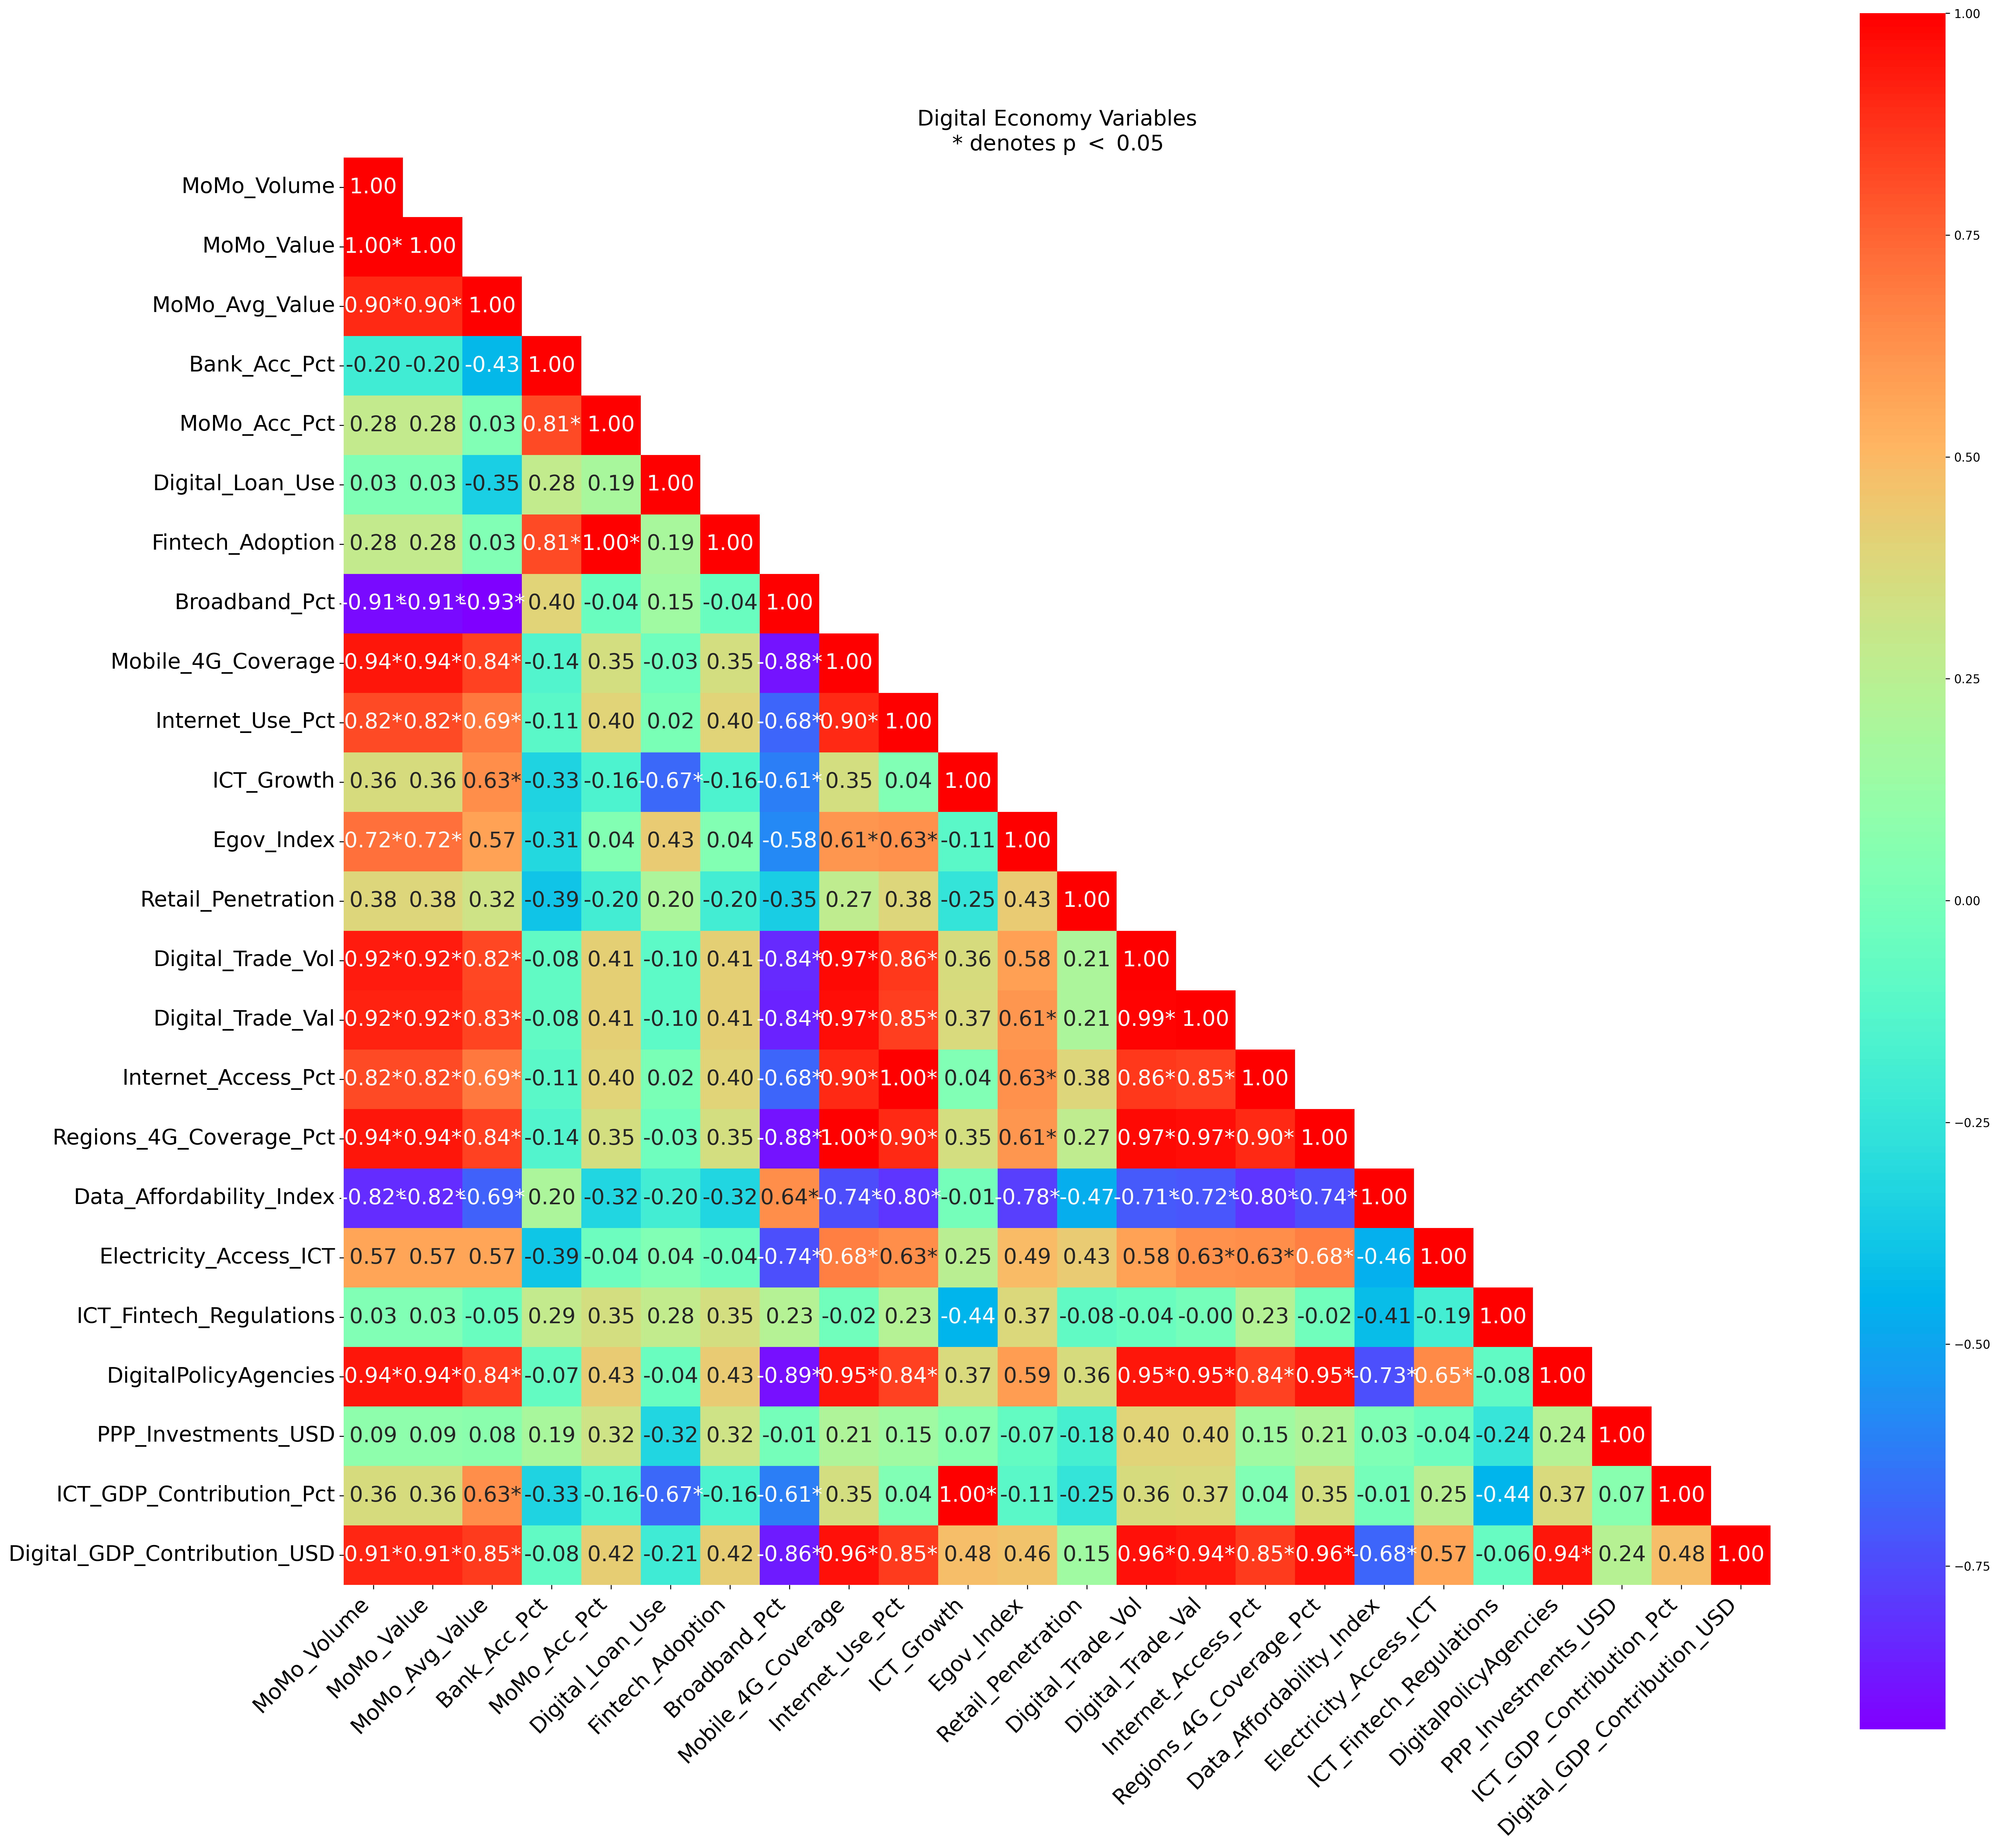

In [83]:
plot_correlation_matrix(
                        df= dff,
                        title="Digital Economy Variables",
                        title_fontsize=18,
                        annot_fontsize=18,
                        tick_fontsize=18,
                        cmap='rainbow',
                        prefix = 'corr-analysis_raw'
                    )

In [68]:
df_knn_imputed.columns

Index(['Year', 'MoMo_Volume', 'MoMo_Value', 'MoMo_Avg_Value', 'Bank_Acc_Pct',
       'MoMo_Acc_Pct', 'Digital_Loan_Use', 'Loan_Penetration',
       'Fintech_Adoption', 'Broadband_Pct', 'Mobile_4G_Coverage',
       'Internet_Use_Pct', 'ICT_Growth', 'Egov_Index', 'Retail_Penetration',
       'Digital_Trade_Vol', 'Digital_Trade_Val', 'Internet_Access_Pct',
       'Regions_4G_Coverage_Pct', 'Data_Affordability_Index',
       'Electricity_Access_ICT', 'ICT_Fintech_Regulations',
       'DigitalPolicyAgencies', 'PPP_Investments_USD',
       'ICT_GDP_Contribution_Pct', 'Digital_GDP_Contribution_USD'],
      dtype='object')

In [80]:
pd.set_option("display.precision", 2)

In [81]:
dff.describe().T

count      mean       std       min       25%  \
MoMo_Volume                    11.0  2.90e+09  2.79e+09  4.09e+07  6.24e+08   
MoMo_Value                     11.0  7.34e+11  9.68e+11  1.83e+08  5.25e+08   
MoMo_Avg_Value                 11.0  1.46e+02  1.29e+02  6.15e-01  3.59e+00   
Bank_Acc_Pct                   11.0  3.87e+01  1.72e+00  3.46e+01  3.87e+01   
MoMo_Acc_Pct                   11.0  3.72e+01  1.05e+01  1.30e+01  3.72e+01   
Digital_Loan_Use               11.0  9.11e+00  9.87e-01  7.40e+00  9.11e+00   
Fintech_Adoption               11.0  4.57e+01  8.44e+00  2.50e+01  4.57e+01   
Broadband_Pct                  11.0  2.15e-01  1.02e-01  4.00e-02  1.50e-01   
Mobile_4G_Coverage             11.0  5.58e-01  3.66e-01  1.10e-02  3.05e-01   
Internet_Use_Pct               11.0  4.56e-01  2.07e-01  1.90e-01  2.55e-01   
ICT_Growth                     11.0  2.15e-01  1.25e-01  4.20e-02  1.25e-01   
Egov_Index                     11.0  5.18e-01  7.53e-02  3.74e-01  5.02e-01   
Retail_Penetration             11.0  2.22e-01  3.69e-02  1.70e-01  2.12e-01   
Digital_Trade_Vol              11.0  2.19e+09  1.76e+09  4.28e+07  6.62e+08   
Digital_Trade_Val              11.0  4.83e+11  4.51e+11  4.56e+06  8.93e+10   
Internet_Access_Pct            11.0  4.56e-01  2.07e-01  1.90e-01  2.55e-01   
Regions_4G_Coverage_Pct        11.0  5.58e-01  3.66e-01  1.10e-02  3.05e-01   
Data_Affordability_Index       11.0  3.35e-02  1.38e-02  1.48e-02  2.07e-02   
Electricity_Access_ICT         11.0  8.60e-01  2.17e-02  8.04e-01  8.60e-01   
ICT_Fintech_Regulations        11.0  1.20e+00  5.29e-01  0.00e+00  1.10e+00   
DigitalPolicyAgencies          11.0  1.01e+01  8.31e-01  9.00e+00  9.50e+00   
PPP_Investments_USD            11.0  1.81e+10  4.37e+09  6.85e+09  1.81e+10   
ICT_GDP_Contribution_Pct       11.0  2.15e-01  1.25e-01  4.20e-02  1.25e-01   
Digital_GDP_Contribution_USD   11.0  6.64e+10  9.84e+09  4.94e+10  5.83e+10   

                                   50%       75%       max  
MoMo_Volume                   2.01e+09  4.66e+09  8.09e+09  
MoMo_Value                    3.09e+11  1.03e+12  3.01e+12  
MoMo_Avg_Value                1.54e+02  2.21e+02  3.72e+02  
Bank_Acc_Pct                  3.87e+01  3.87e+01  4.23e+01  
MoMo_Acc_Pct                  3.72e+01  3.72e+01  5.97e+01  
Digital_Loan_Use              9.11e+00  9.11e+00  1.16e+01  
Fintech_Adoption              4.57e+01  4.57e+01  6.20e+01  
Broadband_Pct                 1.70e-01  2.93e-01  3.70e-01  
Mobile_4G_Coverage            5.80e-01  8.72e-01  9.93e-01  
Internet_Use_Pct              4.30e-01  6.55e-01  7.00e-01  
ICT_Growth                    2.15e-01  2.81e-01  4.65e-01  
Egov_Index                    5.02e-01  5.68e-01  6.32e-01  
Retail_Penetration            2.14e-01  2.27e-01  3.00e-01  
Digital_Trade_Vol             2.08e+09  3.22e+09  5.23e+09  
Digital_Trade_Val             3.46e+11  7.34e+11  1.26e+12  
Internet_Access_Pct           4.30e-01  6.55e-01  7.00e-01  
Regions_4G_Coverage_Pct       5.80e-01  8.72e-01  9.93e-01  
Data_Affordability_Index      3.70e-02  4.69e-02  4.98e-02  
Electricity_Access_ICT        8.60e-01  8.60e-01  8.88e-01  
ICT_Fintech_Regulations       1.20e+00  1.20e+00  2.00e+00  
DigitalPolicyAgencies         1.00e+01  1.10e+01  1.10e+01  
PPP_Investments_USD           1.81e+10  1.81e+10  2.42e+10  
ICT_GDP_Contribution_Pct      2.15e-01  2.81e-01  4.65e-01  
Digital_GDP_Contribution_USD  6.83e+10  7.40e+10  7.95e+10

In [82]:
dff.shape

(11, 24)

/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


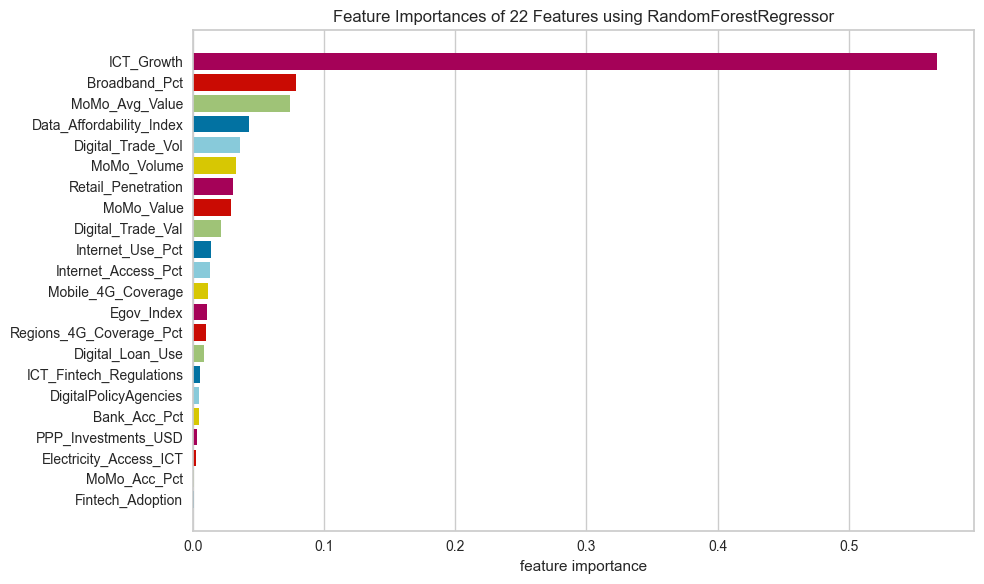

/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


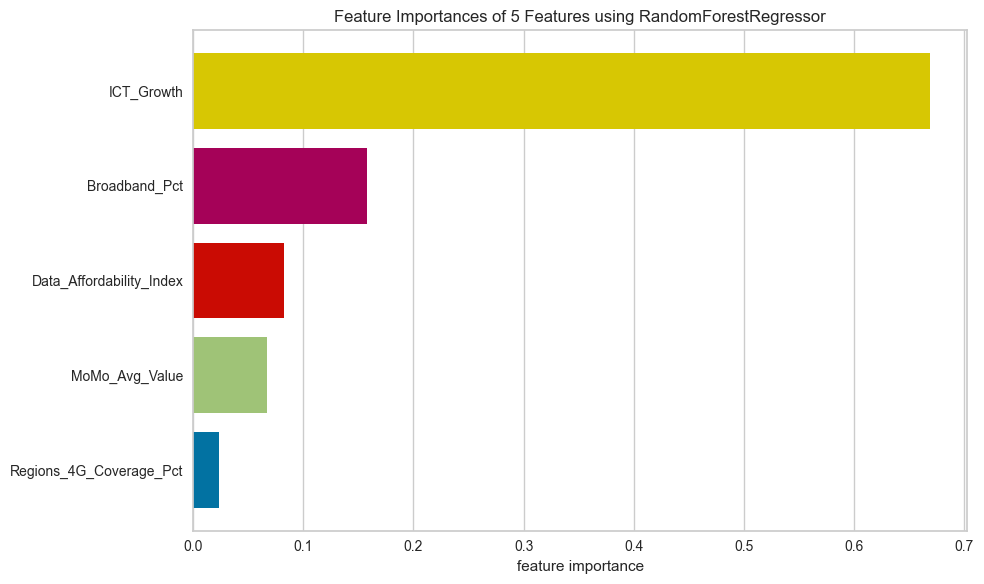

<Axes: title={'center': 'Feature Importances of 5 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from yellowbrick.features import FeatureImportances

# -----------------------------
# 1. Setup features & target
# -----------------------------
X = dff.drop(columns=['ICT_GDP_Contribution_Pct', 'Digital_GDP_Contribution_USD'])
y = dff['ICT_GDP_Contribution_Pct']

# -----------------------------
# 2. Random Forest Feature Importances (on all features)
# -----------------------------
rf_model_all = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_all.fit(X, y)

plt.figure(figsize=(10, 6))
viz1 = FeatureImportances(rf_model_all, labels=X.columns, relative=False)
viz1.fit(X, y)
viz1.show()

# -----------------------------
# 3. RFE + New RF Model (on selected features)
# -----------------------------
rfe = RFE(estimator=rf_model_all, n_features_to_select=5)
rfe.fit(X, y)

# Get selected feature subset
selected_cols = X.columns[rfe.support_]
X_selected = X[selected_cols]

# Train new RF model only on selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_selected, y)

plt.figure(figsize=(10, 6))
viz2 = FeatureImportances(rf_model_selected, labels=selected_cols, relative=False)
viz2.fit(X_selected, y)
viz2.show()


/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


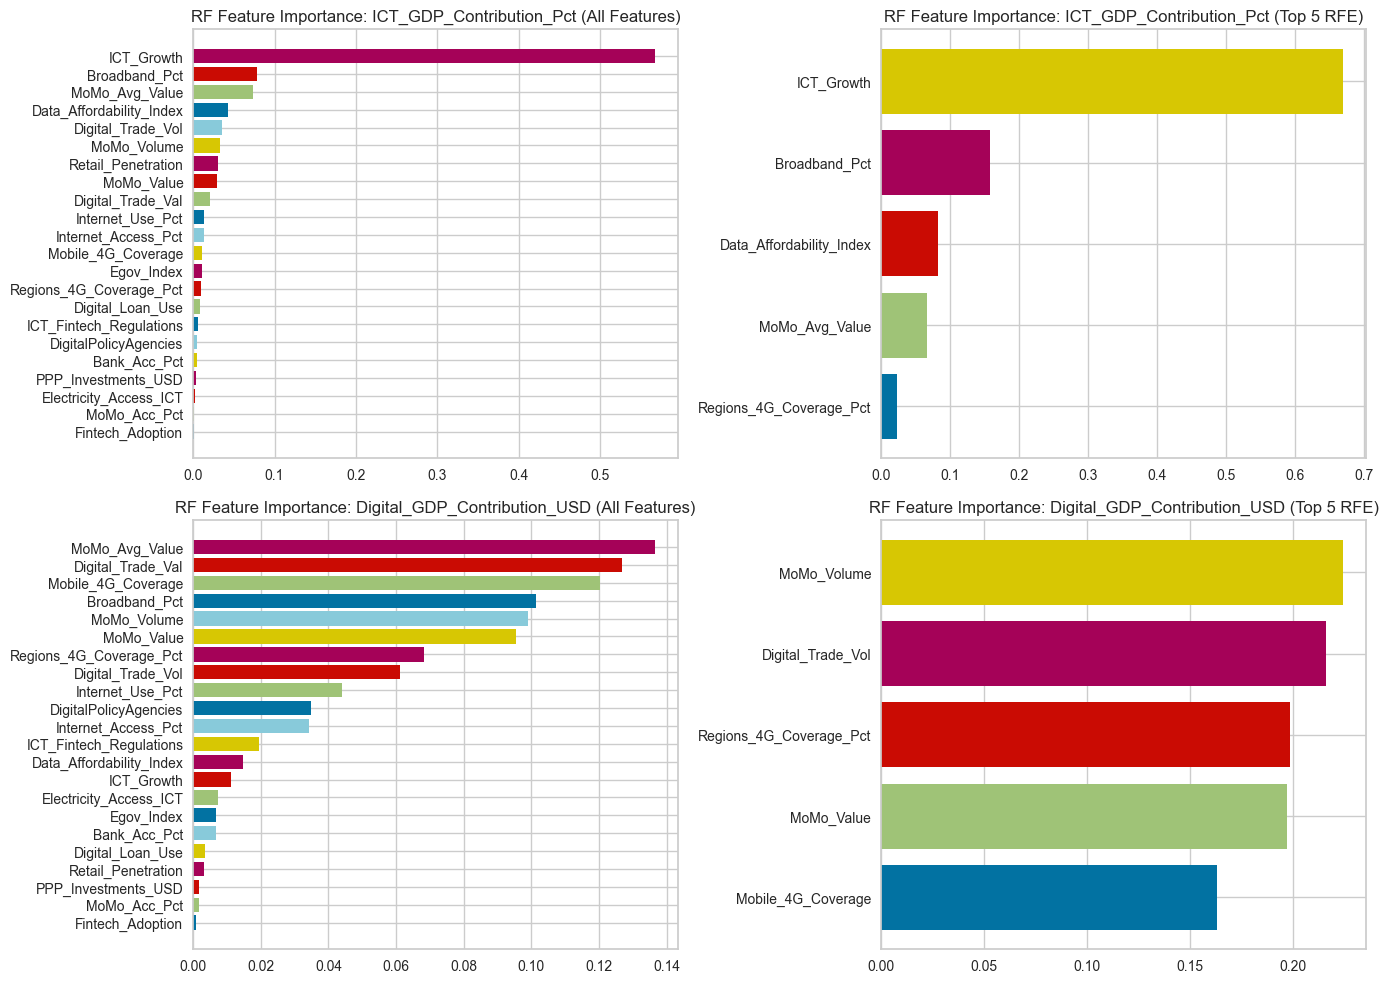

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from yellowbrick.features import FeatureImportances

# -----------------------------
# 1. Setup features & targets
# -----------------------------
X = dff.drop(columns=['ICT_GDP_Contribution_Pct', 'Digital_GDP_Contribution_USD'])
y1 = dff['ICT_GDP_Contribution_Pct']
y2 = dff['Digital_GDP_Contribution_USD']

# -----------------------------
# 2. Random Forest + RFE for Both Targets
# -----------------------------
def feature_selection_and_plot(X, y, title, ax1, ax2):
    # Full RF model on all features
    rf_all = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_all.fit(X, y)

    # Plot feature importances (All)
    viz_all = FeatureImportances(rf_all, labels=X.columns, ax=ax1, relative=False)
    viz_all.fit(X, y)
    ax1.set_title(f"RF Feature Importance: {title} (All Features)")

    # RFE to select top 5
    rfe = RFE(estimator=rf_all, n_features_to_select=5)
    rfe.fit(X, y)
    selected_cols = X.columns[rfe.support_]

    # New RF model on selected
    rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_selected.fit(X[selected_cols], y)

    # Plot feature importances (Selected)
    viz_rfe = FeatureImportances(rf_selected, labels=selected_cols, ax=ax2, relative=False)
    viz_rfe.fit(X[selected_cols], y)
    ax2.set_title(f"RF Feature Importance: {title} (Top 5 RFE)")

# -----------------------------
# 3. Plotting side by side
# -----------------------------
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Top row: ICT GDP
feature_selection_and_plot(X, y1, 'ICT_GDP_Contribution_Pct', axes[0, 0], axes[0, 1])

# Bottom row: Digital GDP
feature_selection_and_plot(X, y2, 'Digital_GDP_Contribution_USD', axes[1, 0], axes[1, 1])

plt.tight_layout()
plt.show()


/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


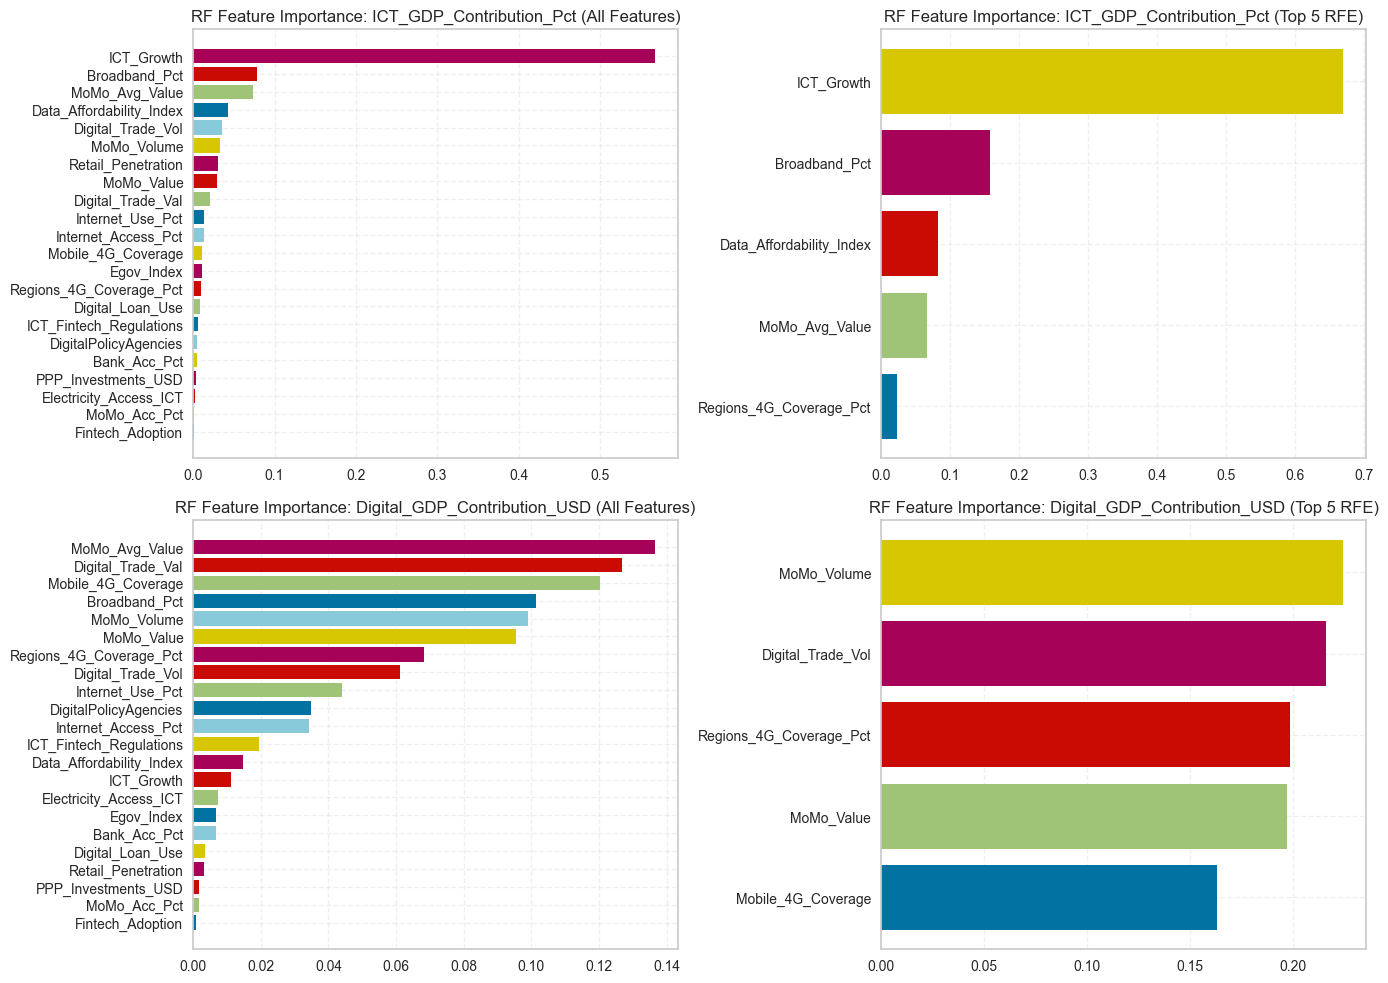

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from yellowbrick.features import FeatureImportances

# 1. Setup features & targets
X = dff.drop(columns=['ICT_GDP_Contribution_Pct', 'Digital_GDP_Contribution_USD'])
y1 = dff['ICT_GDP_Contribution_Pct']
y2 = dff['Digital_GDP_Contribution_USD']

# 2. Function for RF + RFE + plotting
def feature_selection_and_plot(X, y, title, ax1, ax2):
    # Fit RF on all features
    rf_all = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_all.fit(X, y)

    # All features importance
    viz_all = FeatureImportances(rf_all, labels=X.columns, ax=ax1, relative=False)
    viz_all.fit(X, y)
    ax1.set_title(f"RF Feature Importance: {title} (All Features)")
    ax1.grid(True, linestyle="--", alpha=0.3)

    # RFE Top 5
    rfe = RFE(estimator=rf_all, n_features_to_select=5)
    rfe.fit(X, y)
    selected_cols = X.columns[rfe.support_]

    # RF on top 5
    rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_selected.fit(X[selected_cols], y)

    # Top 5 features importance
    viz_rfe = FeatureImportances(rf_selected, labels=selected_cols, ax=ax2, relative=False)
    viz_rfe.fit(X[selected_cols], y)
    ax2.set_title(f"RF Feature Importance: {title} (Top 5 RFE)")
    ax2.grid(True, linestyle="--", alpha=0.3)

# 3. Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Top row: ICT GDP
feature_selection_and_plot(X, y1, 'ICT_GDP_Contribution_Pct', axes[0, 0], axes[0, 1])

# Bottom row: Digital GDP
feature_selection_and_plot(X, y2, 'Digital_GDP_Contribution_USD', axes[1, 0], axes[1, 1])

plt.tight_layout()
plt.show()


Random Forest feature importance ranks all features in a single pass by how much each reduces prediction error (impurity) across trees, without removing any variables, while RFE (Recursive Feature Elimination) iteratively removes the least important feature and retrains the model at each step to identify a subset that optimizes performance with fewer predictors. Because RFE considers how feature combinations affect accuracy as variables are pruned, it often selects different features than simply taking the top-ranked importances. If your goal is to **interpret which variables most influence the model overall**, use Random Forest importances; if you want a **compact, high-performing subset of features**, RFE is more appropriate.


In [ ]:
# ['MoMo_Volume',
#  'MoMo_Value',
#  'MoMo_Avg_Value',
#  'Bank_Acc_Pct',
#  'MoMo_Acc_Pct',
#  'Digital_Loan_Use',
#  'Fintech_Adoption',
#  'Broadband_Pct',
#  'Mobile_4G_Coverage',
#  'Internet_Use_Pct',
#  'ICT_Growth',
#  'Egov_Index',
#  'Retail_Penetration',
#  'Digital_Trade_Vol',
#  'Digital_Trade_Val',
#  'Internet_Access_Pct',
#  'Regions_4G_Coverage_Pct',
#  'Data_Affordability_Index',
#  'Electricity_Access_ICT',
#  'ICT_Fintech_Regulations',
#  'DigitalPolicyAgencies',
#  'PPP_Investments_USD',
#  'ICT_GDP_Contribution_Pct',
#  'Digital_GDP_Contribution_USD']

In [91]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -------------------------------
# 1. Prepare datasets
# -------------------------------
# All features
X_all = dff.drop(columns=['ICT_GDP_Contribution_Pct', 'Digital_GDP_Contribution_USD'])

# Target variable (choose one to start)
y = dff['ICT_GDP_Contribution_Pct']

# Top 5 Random Forest selected features
rf_top5 = [
    'ICT_Growth',
    'Broadband_Pct',
    'Data_Affordability_Index',
    'MoMo_Avg_Value',
    'Regions_4G_Coverage_Pct'
]

# Top 5 RFE selected features
rfe_top5 = [
    'ICT_Growth',
    'Broadband_Pct',
    'Data_Affordability_Index',
    'MoMo_Avg_Value',
    'Regions_4G_Coverage_Pct'
]

# (Note: If your RFE selected features are different, update `rfe_top5`)

# -------------------------------
# 2. Split train/test
# -------------------------------
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

X_train_rf = X_train_all[rf_top5]
X_test_rf = X_test_all[rf_top5]

X_train_rfe = X_train_all[rfe_top5]
X_test_rfe = X_test_all[rfe_top5]

# -------------------------------
# 3. Train Random Forest Regressor on each
# -------------------------------
model_all = RandomForestRegressor(random_state=42)
model_rf = RandomForestRegressor(random_state=42)
model_rfe = RandomForestRegressor(random_state=42)

model_all.fit(X_train_all, y_train)
model_rf.fit(X_train_rf, y_train)
model_rfe.fit(X_train_rfe, y_train)

# -------------------------------
# 4. Predict and evaluate
# -------------------------------
def evaluate(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

results = {}

results['All Features'] = evaluate(y_test, model_all.predict(X_test_all))
results['Top 5 RF'] = evaluate(y_test, model_rf.predict(X_test_rf))
results['Top 5 RFE'] = evaluate(y_test, model_rfe.predict(X_test_rfe))

# -------------------------------
# 5. Display comparison
# -------------------------------
results_df = pd.DataFrame(results).T
print("\nRandom Forest Performance Comparison:\n")
print(results_df)




Random Forest Performance Comparison:

                R2  RMSE   MAE
All Features -4.21  0.20  0.16
Top 5 RF     -3.10  0.18  0.14
Top 5 RFE    -3.10  0.18  0.14


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Select Features & Target
# -------------------------------
features = [
    'ICT_Growth',
    'Broadband_Pct',
    'Data_Affordability_Index',
    'MoMo_Avg_Value',
    'Regions_4G_Coverage_Pct'
]

X = dff[features]
y = dff['ICT_GDP_Contribution_Pct']

# Standardise for models sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 2. Define and Train Models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'LassoCV': LassoCV(cv=5, random_state=42),
    'ElasticNetCV': ElasticNetCV(cv=5, random_state=42),
    'Gaussian Process': GaussianProcessRegressor(kernel=C(1.0) * RBF(1.0), random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results[name] = {
            'R2': r2_score(y_test, preds),
            'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
            'MAE': mean_absolute_error(y_test, preds)
        }
    except Exception as e:
        results[name] = {'R2': None, 'RMSE': None, 'MAE': None, 'Error': str(e)}

# -------------------------------
# 3. Show Results
# -------------------------------
results_df = pd.DataFrame(results).T
pd.set_option("display.precision", 3)
print("\nModel Comparison on ICT_GDP_Contribution_Pct:\n")
print(results_df)



Model Comparison on ICT_GDP_Contribution_Pct:

                      R2       RMSE        MAE
Linear Regression  1.000  4.532e-17  3.701e-17
LassoCV            1.000  2.704e-04  2.388e-04
ElasticNetCV       1.000  3.951e-04  3.359e-04
Gaussian Process   1.000  3.436e-08  2.918e-08
XGBoost           -0.009  8.813e-02  6.042e-02


/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Define Feature Scenarios
# -------------------------------
target = 'ICT_GDP_Contribution_Pct'

all_features = dff.drop(columns=[target, 'Digital_GDP_Contribution_USD']).columns.tolist()

top5_rf = [
    'ICT_Growth',
    'Broadband_Pct',
    'Data_Affordability_Index',
    'MoMo_Avg_Value',
    'Regions_4G_Coverage_Pct'
]

top5_rfe = [
    'MoMo_Avg_Value',
    'Electricity_Access_ICT',
    'ICT_Fintech_Regulations',
    'Broadband_Pct',
    'Data_Affordability_Index'
]

feature_sets = {
    'All Features': all_features,
    'Top 5 RF': top5_rf,
    'Top 5 RFE': top5_rfe
}

# -------------------------------
# 2. Define Models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'LassoCV': LassoCV(cv=5, random_state=42),
    'ElasticNetCV': ElasticNetCV(cv=5, random_state=42),
    'Gaussian Process': GaussianProcessRegressor(kernel=C(1.0)*RBF(1.0), random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# -------------------------------
# 3. Evaluate Each Scenario
# -------------------------------
all_results = []

for set_name, features in feature_sets.items():
    X = dff[features]
    y = dff[target]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': r2_score(y_test, preds),
                'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
                'MAE': mean_absolute_error(y_test, preds)
            }
        except Exception as e:
            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': None,
                'RMSE': None,
                'MAE': None,
                'Error': str(e)
            }
        all_results.append(result)

# -------------------------------
# 4. Display Results
# -------------------------------
results_df = pd.DataFrame(all_results)
pd.set_option("display.precision", 3)
print("\nModel Comparison on ICT_GDP_Contribution_Pct:\n")
print(results_df.pivot(index='Model', columns='Features', values='R2'))



Model Comparison on ICT_GDP_Contribution_Pct:

Features           All Features  Top 5 RF  Top 5 RFE
Model                                               
ElasticNetCV              0.846     1.000     -4.040
Gaussian Process         -5.884     1.000     -8.031
LassoCV                   0.927     1.000     -3.963
Linear Regression        -5.964     1.000     -3.915
XGBoost                  -5.091    -0.009     -5.204


/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


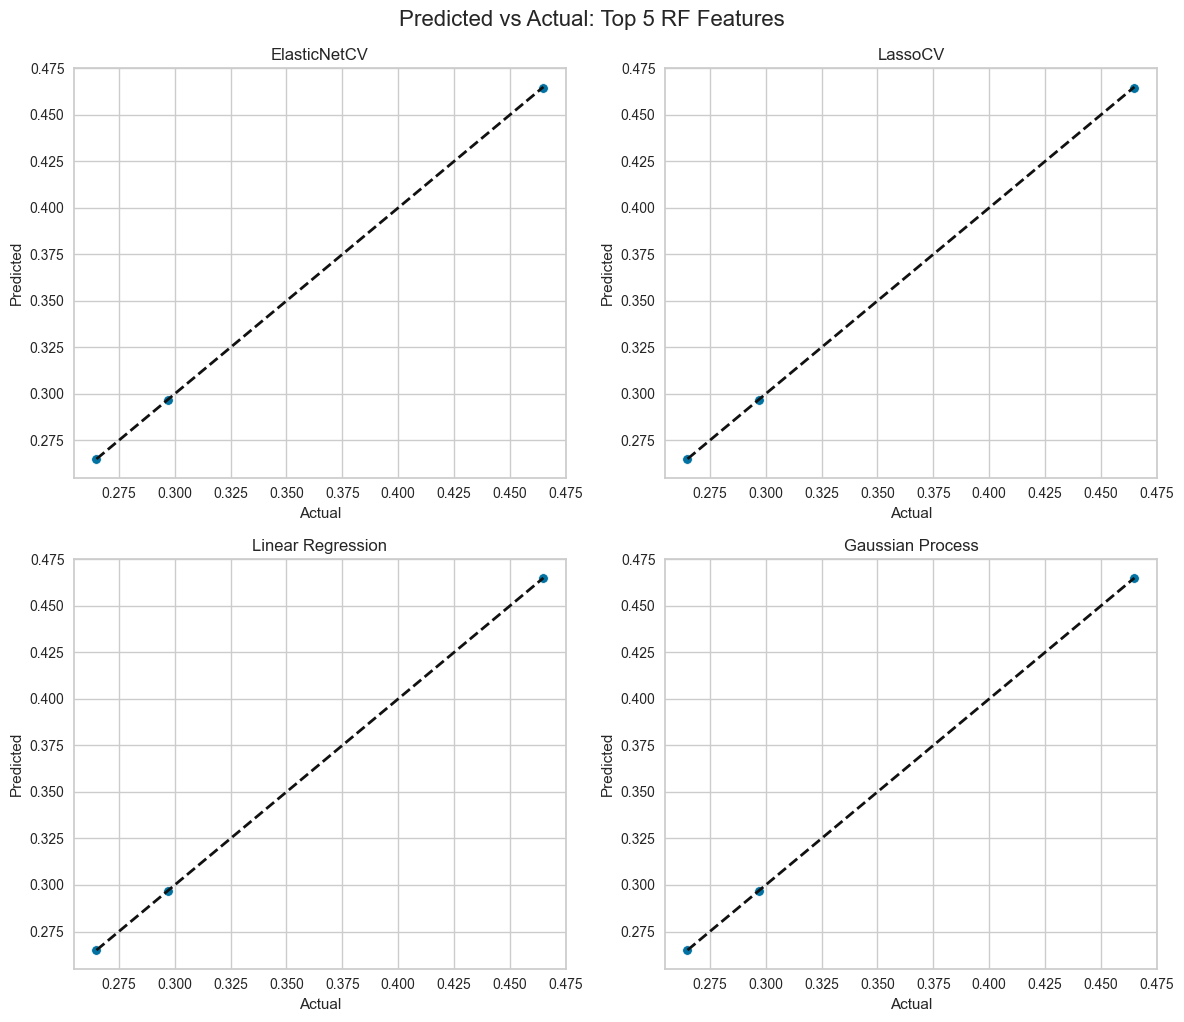

In [94]:
# Re-import necessary libraries for model definitions (in case of kernel reset)
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Re-run the same plotting block with definitions fixed

# Models to visualise using Top 5 RF features
top_models = {
    "ElasticNetCV": ElasticNetCV(cv=5, random_state=42),
    "LassoCV": LassoCV(cv=5, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gaussian Process": GaussianProcessRegressor(kernel=C(1.0) * RBF(1.0), random_state=42)
}

# Features and target
features_rf = [
    'ICT_Growth',
    'Broadband_Pct',
    'Data_Affordability_Index',
    'MoMo_Avg_Value',
    'Regions_4G_Coverage_Pct'
]
X = dff[features_rf]
y = dff['ICT_GDP_Contribution_Pct']

# Standardise
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(top_models.items()):
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        sns.scatterplot(x=y_test, y=preds, ax=axes[i])
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name}')
        axes[i].set_xlabel("Actual")
        axes[i].set_ylabel("Predicted")
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center')
        axes[i].set_title(f'{name} (Error)')

plt.tight_layout()
plt.suptitle("Predicted vs Actual: Top 5 RF Features", fontsize=16, y=1.02)
plt.show()


/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org


Model Comparison on ICT_GDP_Contribution_Pct:

Features           All Features  Top 5 RF  Top 5 RFE
Model                                               
ElasticNetCV              0.846     1.000     -4.040
Gaussian Process         -5.884     1.000     -8.031
LassoCV                   0.927     1.000     -3.963
Linear Regression        -5.964     1.000     -3.915
XGBoost                  -5.091    -0.009     -5.204


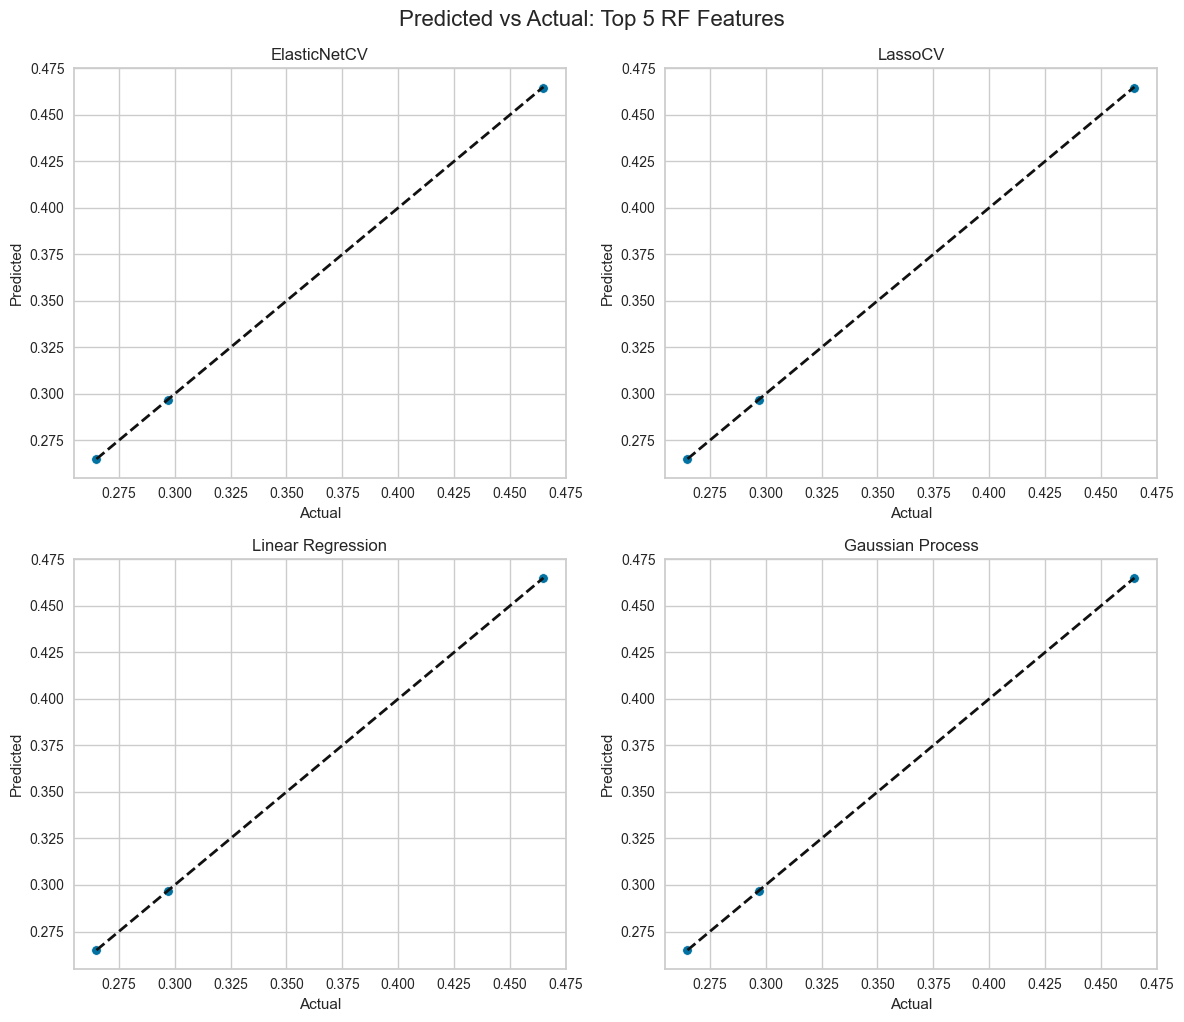

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Define Feature Scenarios
# -------------------------------
target = 'ICT_GDP_Contribution_Pct'

all_features = dff.drop(columns=[target, 'Digital_GDP_Contribution_USD']).columns.tolist()

top5_rf = [
    'ICT_Growth',
    'Broadband_Pct',
    'Data_Affordability_Index',
    'MoMo_Avg_Value',
    'Regions_4G_Coverage_Pct'
]

top5_rfe = [
    'MoMo_Avg_Value',
    'Electricity_Access_ICT',
    'ICT_Fintech_Regulations',
    'Broadband_Pct',
    'Data_Affordability_Index'
]

feature_sets = {
    'All Features': all_features,
    'Top 5 RF': top5_rf,
    'Top 5 RFE': top5_rfe
}

# -------------------------------
# 2. Define Models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'LassoCV': LassoCV(cv=5, random_state=42),
    'ElasticNetCV': ElasticNetCV(cv=5, random_state=42),
    'Gaussian Process': GaussianProcessRegressor(kernel=C(1.0)*RBF(1.0), random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# -------------------------------
# 3. Evaluate Each Scenario
# -------------------------------
all_results = []

for set_name, features in feature_sets.items():
    X = dff[features]
    y = dff[target]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': r2_score(y_test, preds),
                'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
                'MAE': mean_absolute_error(y_test, preds)
            }
        except Exception as e:
            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': None,
                'RMSE': None,
                'MAE': None,
                'Error': str(e)
            }
        all_results.append(result)

# -------------------------------
# 4. Display Results
# -------------------------------
results_df = pd.DataFrame(all_results)
pd.set_option("display.precision", 3)
print("\nModel Comparison on ICT_GDP_Contribution_Pct:\n")
print(results_df.pivot(index='Model', columns='Features', values='R2'))

# -------------------------------
# 5. Predicted vs Actual Plots (Top 5 RF)
# -------------------------------
# Use only top 4 models (exclude XGBoost for now due to weak performance)
top_models_plot = {
    "ElasticNetCV": ElasticNetCV(cv=5, random_state=42),
    "LassoCV": LassoCV(cv=5, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gaussian Process": GaussianProcessRegressor(kernel=C(1.0) * RBF(1.0), random_state=42)
}

X = dff[top5_rf]
y = dff['ICT_GDP_Contribution_Pct']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(top_models_plot.items()):
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        sns.scatterplot(x=y_test, y=preds, ax=axes[i])
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name}')
        axes[i].set_xlabel("Actual")
        axes[i].set_ylabel("Predicted")
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center')
        axes[i].set_title(f'{name} (Error)')

plt.tight_layout()
plt.suptitle("Predicted vs Actual: Top 5 RF Features", fontsize=16, y=1.02)
plt.show()


## ICT_GDP_Contribution_Pct

/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find


Model Comparison on ICT_GDP_Contribution_Pct:

Features           All Features  Top 5 RF  Top 5 RFE
Model                                               
ElasticNetCV              0.846     1.000      1.000
Gaussian Process         -5.884     1.000      1.000
LassoCV                   0.927     1.000      1.000
Linear Regression        -5.964     1.000      1.000
XGBoost                  -5.091    -0.009     -0.009


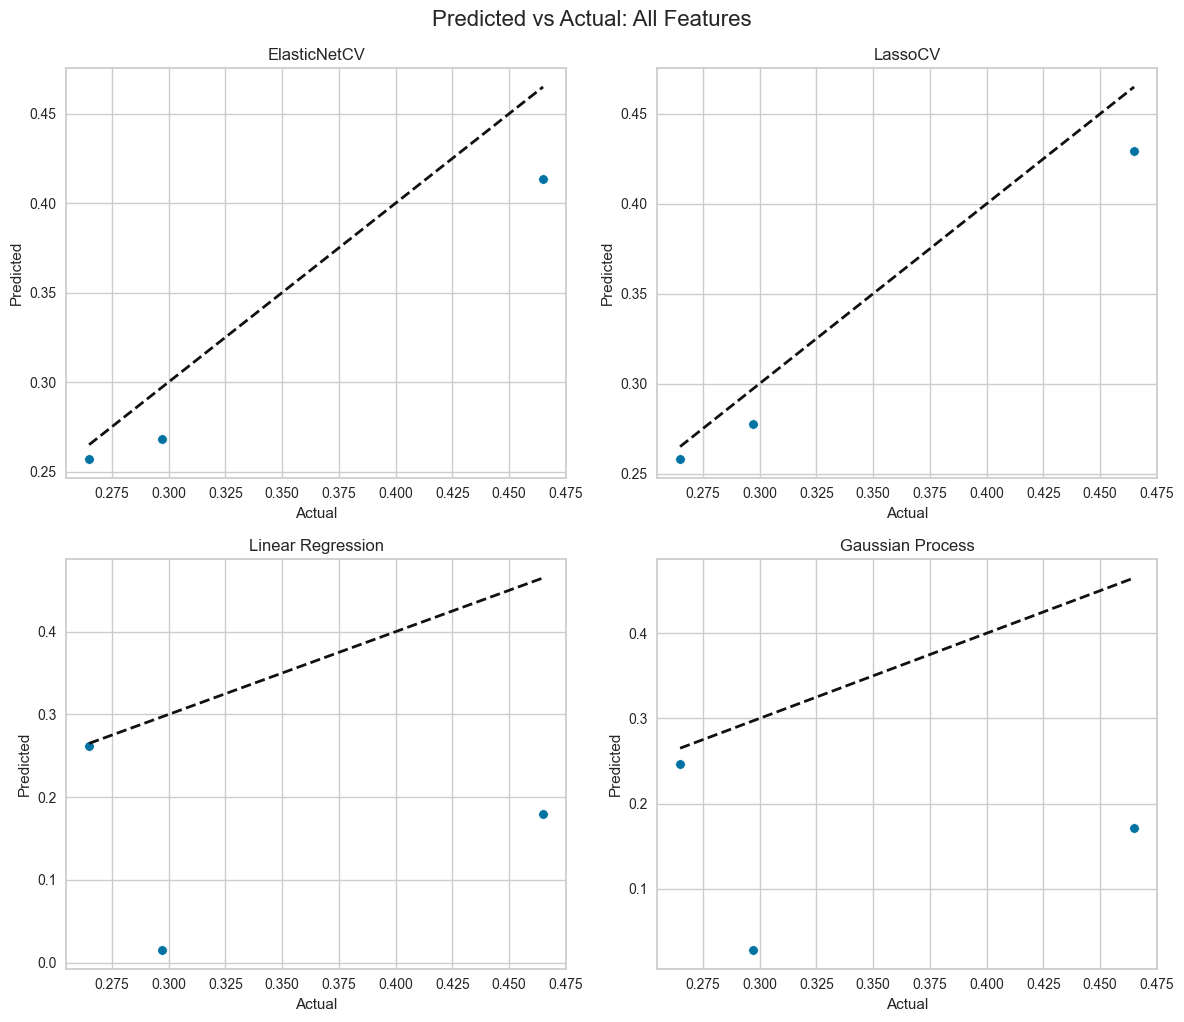

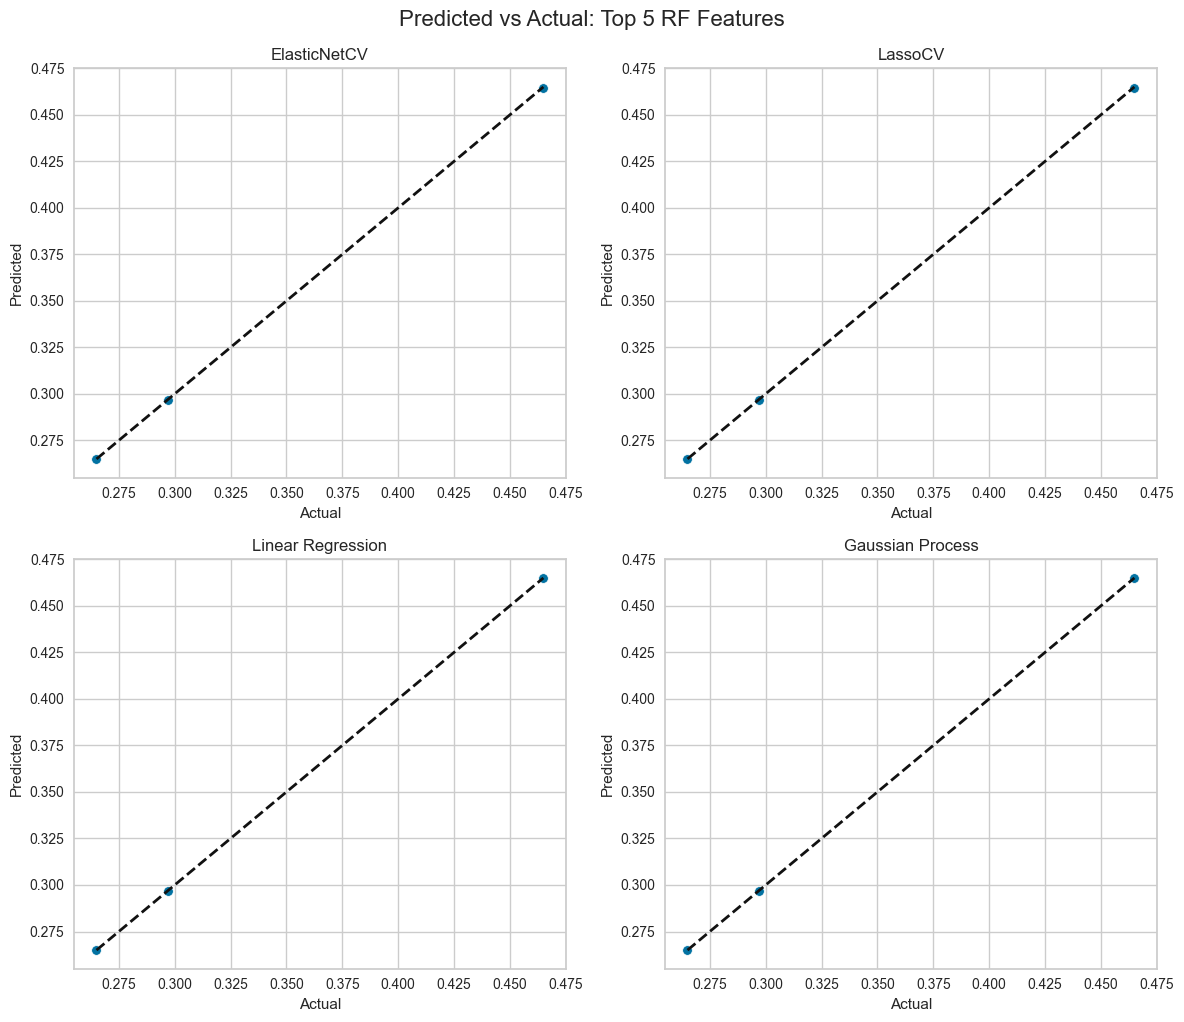

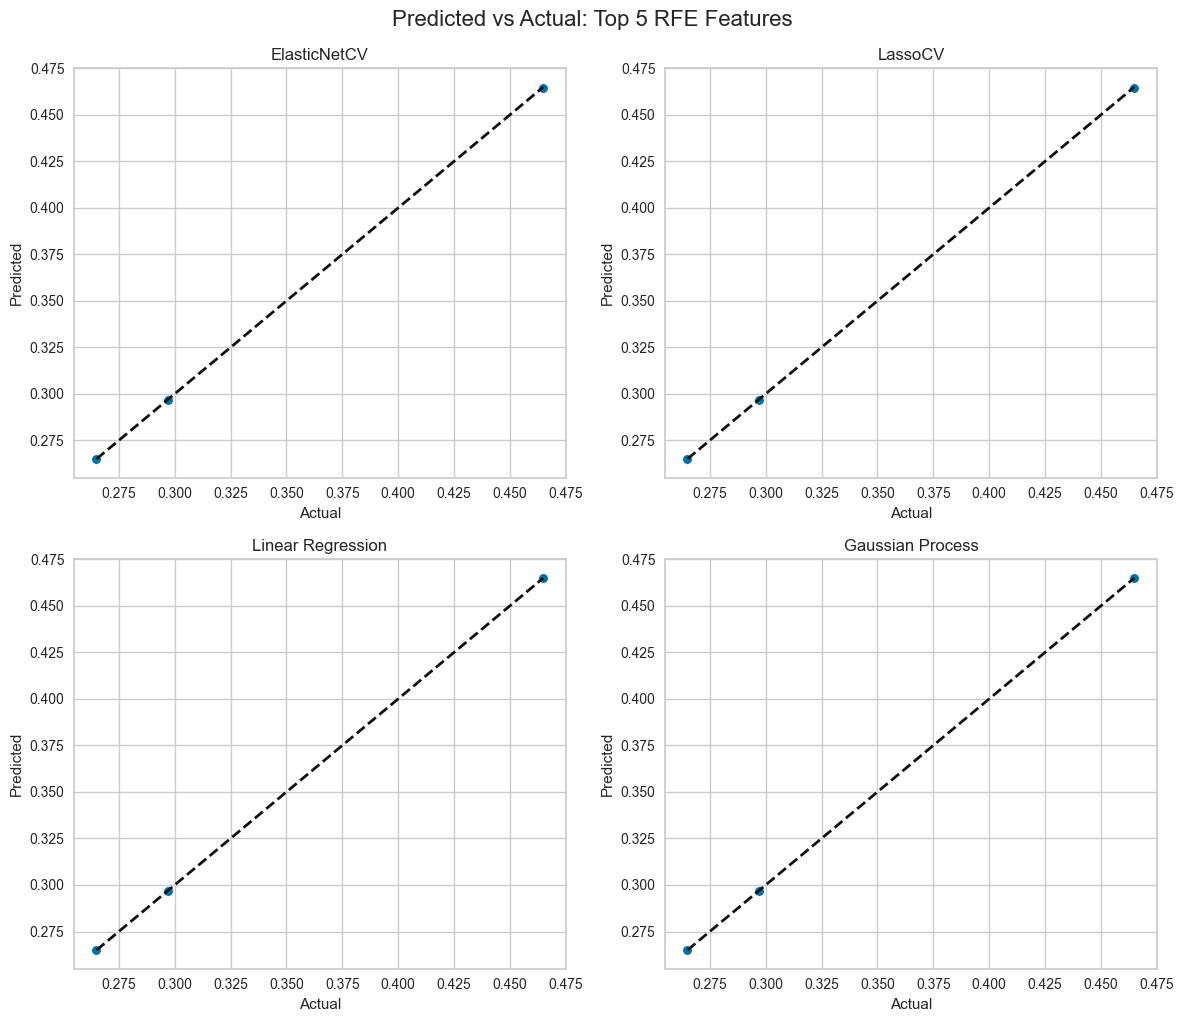

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Define Feature Scenarios
# -------------------------------
target = 'ICT_GDP_Contribution_Pct'

all_features = dff.drop(columns=[target, 'Digital_GDP_Contribution_USD']).columns.tolist()
# rf5: 'ICT_Growth', 'Broadband_Pct','MoMo_Avg_Value','Data_Affordability_Index','Digital_Trade_Vol',
# rfe5: 'ICT_Growth', 'Broadband_Pct','Data_Affordability_Index', 'MoMo_Avg_Value','Regions_4G_Coverage_Pct', 
top5_rf = [
    'ICT_Growth',
    'Broadband_Pct',
    'MoMo_Avg_Value',
    'Data_Affordability_Index',
    'Digital_Trade_Vol'
    ]

top5_rfe = [    
    'ICT_Growth',
    'Broadband_Pct',
    'Data_Affordability_Index',
    'MoMo_Avg_Value',
    'Regions_4G_Coverage_Pct'
]

feature_sets = {
    'All Features': all_features,
    'Top 5 RF': top5_rf,
    'Top 5 RFE': top5_rfe
}

# -------------------------------
# 2. Define Models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'LassoCV': LassoCV(cv=5, random_state=42),
    'ElasticNetCV': ElasticNetCV(cv=5, random_state=42),
    'Gaussian Process': GaussianProcessRegressor(kernel=C(1.0)*RBF(1.0), random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# -------------------------------
# 3. Evaluate Each Scenario
# -------------------------------
all_results = []
all_predictions = {}  # store predictions for plots

for set_name, features in feature_sets.items():
    X = dff[features]
    y = dff[target]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

            # Save predictions
            if model_name in ['ElasticNetCV', 'LassoCV', 'Linear Regression', 'Gaussian Process']:
                all_predictions[(set_name, model_name)] = (y_test, preds)

            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': r2_score(y_test, preds),
                'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
                'MAE': mean_absolute_error(y_test, preds)
            }
        except Exception as e:
            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': None,
                'RMSE': None,
                'MAE': None,
                'Error': str(e)
            }
        all_results.append(result)

# -------------------------------
# 4. Display Results
# -------------------------------
results_df = pd.DataFrame(all_results)
pd.set_option("display.precision", 3)
print("\nModel Comparison on ICT_GDP_Contribution_Pct:\n")
print(results_df.pivot(index='Model', columns='Features', values='R2'))

# -------------------------------
# 5. Plot Predictions (Top 4 Models)
# -------------------------------
def plot_predictions(title, feature_set_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    plot_models = ['ElasticNetCV', 'LassoCV', 'Linear Regression', 'Gaussian Process']
    
    for i, model_name in enumerate(plot_models):
        if (feature_set_name, model_name) in all_predictions:
            y_true, y_pred = all_predictions[(feature_set_name, model_name)]
            sns.scatterplot(x=y_true, y=y_pred, ax=axes[i])
            axes[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
            axes[i].set_title(f'{model_name}')
            axes[i].set_xlabel("Actual")
            axes[i].set_ylabel("Predicted")
        else:
            axes[i].text(0.5, 0.5, "No data", ha='center', va='center')
            axes[i].set_title(f'{model_name} (No Data)')
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

# Plot for each feature set
plot_predictions("Predicted vs Actual: All Features", "All Features")
plot_predictions("Predicted vs Actual: Top 5 RF Features", "Top 5 RF")
plot_predictions("Predicted vs Actual: Top 5 RFE Features", "Top 5 RFE")


In [97]:
dff.columns.to_list()

['MoMo_Volume',
 'MoMo_Value',
 'MoMo_Avg_Value',
 'Bank_Acc_Pct',
 'MoMo_Acc_Pct',
 'Digital_Loan_Use',
 'Fintech_Adoption',
 'Broadband_Pct',
 'Mobile_4G_Coverage',
 'Internet_Use_Pct',
 'ICT_Growth',
 'Egov_Index',
 'Retail_Penetration',
 'Digital_Trade_Vol',
 'Digital_Trade_Val',
 'Internet_Access_Pct',
 'Regions_4G_Coverage_Pct',
 'Data_Affordability_Index',
 'Electricity_Access_ICT',
 'ICT_Fintech_Regulations',
 'DigitalPolicyAgencies',
 'PPP_Investments_USD',
 'ICT_GDP_Contribution_Pct',
 'Digital_GDP_Contribution_USD']

## Digital_GDP_Contribution_USD

/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.914585000379597e+16, tolerance: 5.7143853333333336e+16
  model = cd_fast.enet_coordinate_descent_gram(
/Users/theonarh/Documents/myENV/env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4809878485051392e+17, tolerance: 5.7143853333333336e+16
  model = cd_fast.enet_coordinate_descent_gram(
/User


Model Comparison on ICT_GDP_Contribution_Pct:

Features           All Features   Top 5 RF  Top 5 RFE
Model                                                
ElasticNetCV         -2.658e-04 -2.672e-04 -2.672e-04
Gaussian Process     -1.664e-01 -7.360e-01  7.182e-01
LassoCV               8.505e-01  9.480e-01  9.025e-01
Linear Regression     8.711e-01  9.023e-01  8.676e-01
XGBoost               8.557e-01  8.482e-01  8.446e-01


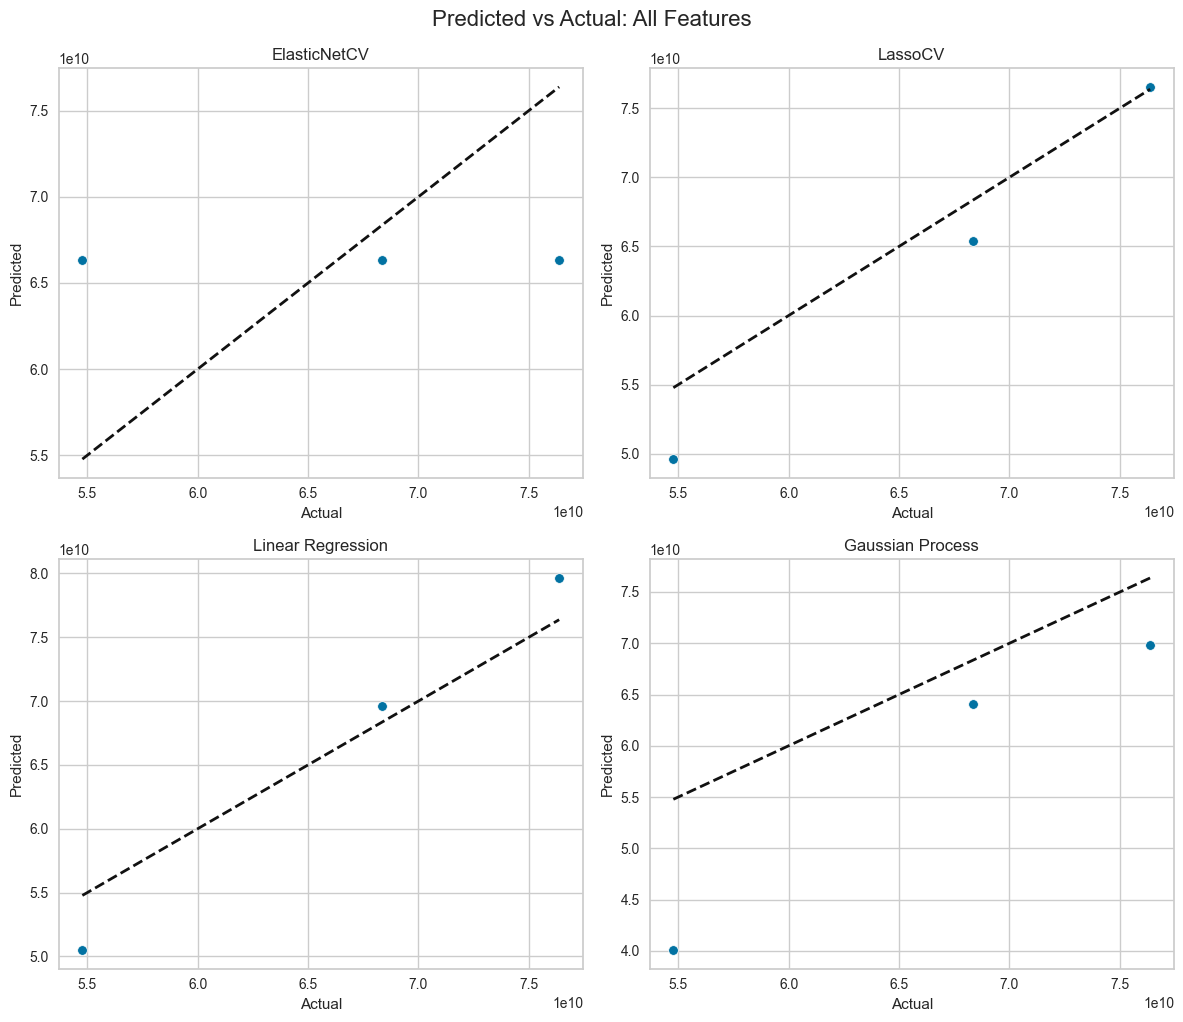

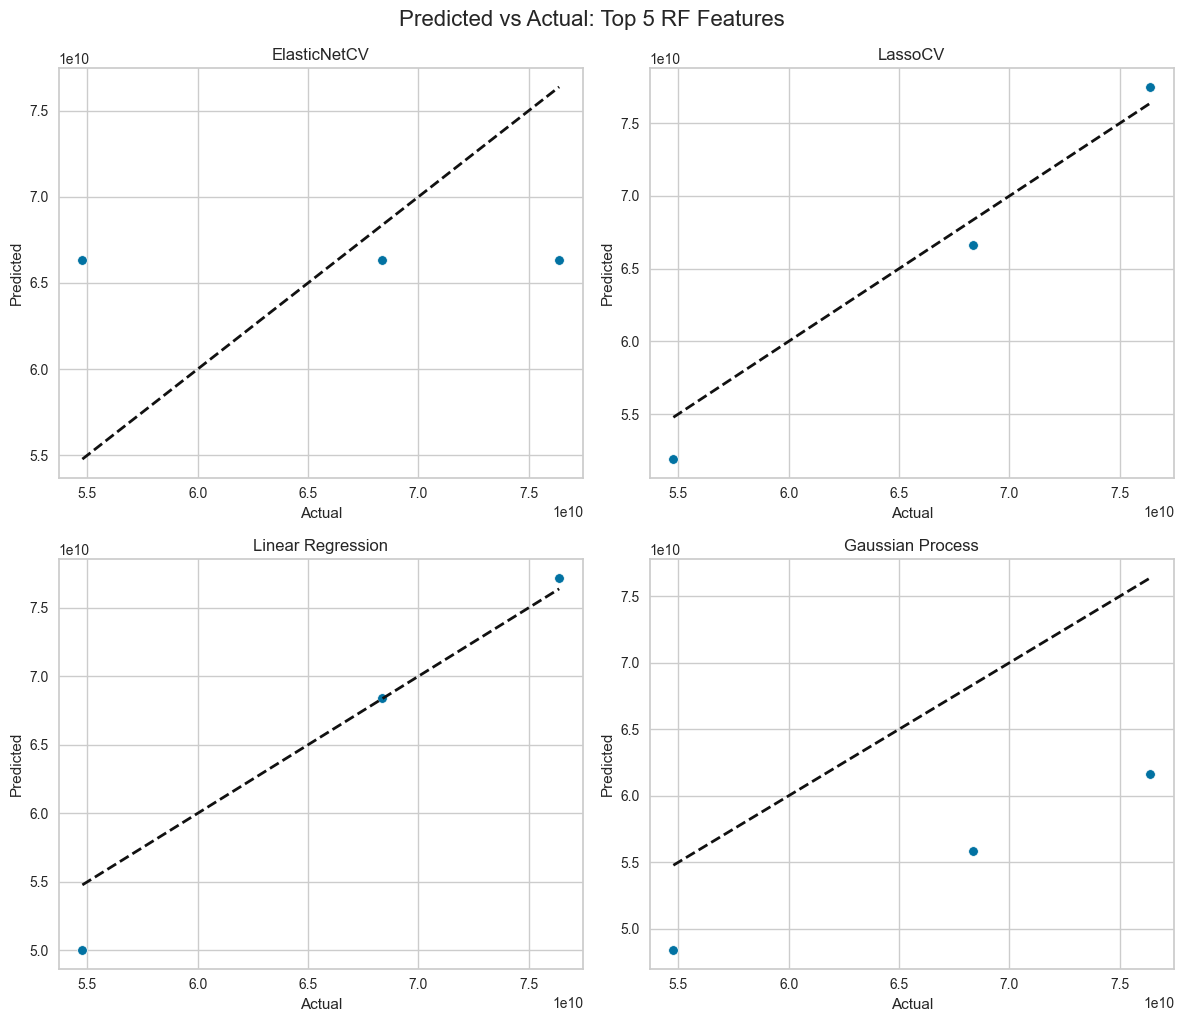

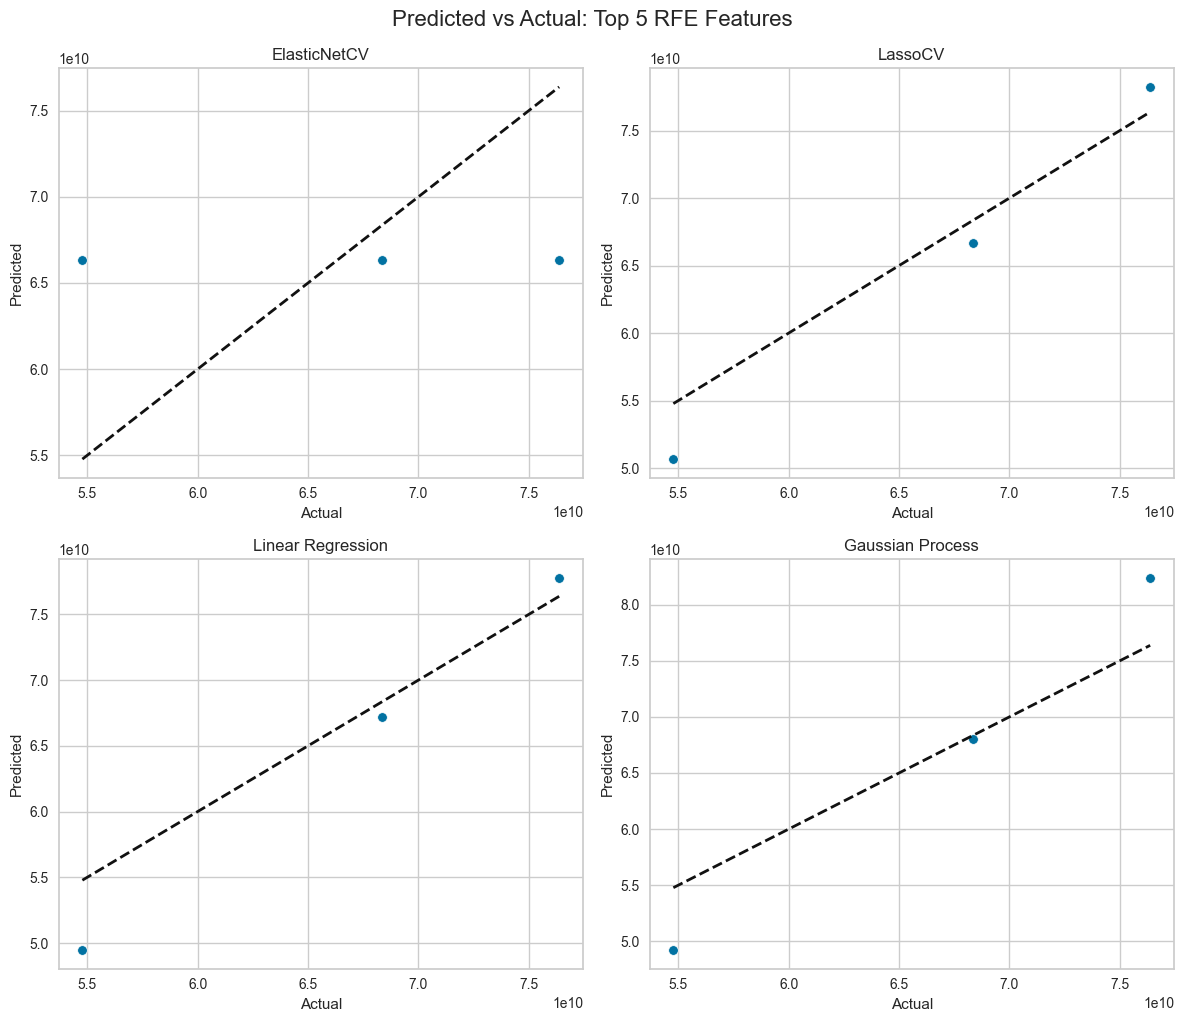

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Define Feature Scenarios
# -------------------------------
target = 'Digital_GDP_Contribution_USD'

all_features = dff.drop(columns=[target, 'ICT_GDP_Contribution_Pct']).columns.tolist()
# rf5: 'ICT_Growth', 'Broadband_Pct','MoMo_Avg_Value','Data_Affordability_Index','Digital_Trade_Vol',
# rfe5: 'ICT_Growth', 'Broadband_Pct','Data_Affordability_Index', 'MoMo_Avg_Value','Regions_4G_Coverage_Pct', 
# rf5: 'MoMo_Avg_Value', 'Digital_Trade_Val', 'Mobile_4G_Coverage', 'Broadband_Pct','MoMo_Volume',
# rfe5: 'MoMo_Volume', 'Digital_Trade_Vol', 'Regions_4G_Coverage_Pct', 'MoMo_Value', 'Mobile_4G_Coverage',
top5_rf = [
    'MoMo_Avg_Value',
    'Digital_Trade_Val',
    'Mobile_4G_Coverage',
    'Broadband_Pct',
    'MoMo_Volume'
    ]

top5_rfe = [    
    'MoMo_Volume',
    'Digital_Trade_Vol',
    'Regions_4G_Coverage_Pct',
    'MoMo_Value',
    'Mobile_4G_Coverage'
]

feature_sets = {
    'All Features': all_features,
    'Top 5 RF': top5_rf,
    'Top 5 RFE': top5_rfe
}

# -------------------------------
# 2. Define Models
# -------------------------------
models = {
    'Linear Regression': LinearRegression(),
    'LassoCV': LassoCV(cv=5, random_state=42),
    'ElasticNetCV': ElasticNetCV(cv=5, random_state=42),
    'Gaussian Process': GaussianProcessRegressor(kernel=C(1.0)*RBF(1.0), random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# -------------------------------
# 3. Evaluate Each Scenario
# -------------------------------
all_results = []
all_predictions = {}  # store predictions for plots

for set_name, features in feature_sets.items():
    X = dff[features]
    y = dff[target]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

            # Save predictions
            if model_name in ['ElasticNetCV', 'LassoCV', 'Linear Regression', 'Gaussian Process']:
                all_predictions[(set_name, model_name)] = (y_test, preds)

            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': r2_score(y_test, preds),
                'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
                'MAE': mean_absolute_error(y_test, preds)
            }
        except Exception as e:
            result = {
                'Features': set_name,
                'Model': model_name,
                'R2': None,
                'RMSE': None,
                'MAE': None,
                'Error': str(e)
            }
        all_results.append(result)

# -------------------------------
# 4. Display Results
# -------------------------------
results_df = pd.DataFrame(all_results)
pd.set_option("display.precision", 3)
print("\nModel Comparison on ICT_GDP_Contribution_Pct:\n")
print(results_df.pivot(index='Model', columns='Features', values='R2'))

# -------------------------------
# 5. Plot Predictions (Top 4 Models)
# -------------------------------
def plot_predictions(title, feature_set_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    plot_models = ['ElasticNetCV', 'LassoCV', 'Linear Regression', 'Gaussian Process']
    
    for i, model_name in enumerate(plot_models):
        if (feature_set_name, model_name) in all_predictions:
            y_true, y_pred = all_predictions[(feature_set_name, model_name)]
            sns.scatterplot(x=y_true, y=y_pred, ax=axes[i])
            axes[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
            axes[i].set_title(f'{model_name}')
            axes[i].set_xlabel("Actual")
            axes[i].set_ylabel("Predicted")
        else:
            axes[i].text(0.5, 0.5, "No data", ha='center', va='center')
            axes[i].set_title(f'{model_name} (No Data)')
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

# Plot for each feature set
plot_predictions("Predicted vs Actual: All Features", "All Features")
plot_predictions("Predicted vs Actual: Top 5 RF Features", "Top 5 RF")
plot_predictions("Predicted vs Actual: Top 5 RFE Features", "Top 5 RFE")
